# EXP 12 Stress induced forcing 

The aim of this script is to develop as many diagnostics as possible on the data from experiment 12 in order to compare them with the numerical simulation carried out on Basilisk. 

We want to see if we observe similar phenomena in both cases, which would allow us to decouple the artefacts of one observation method or the other. 

In the experimental part, the reynolds numbers are much more consequent and the resolution is much greater ($ \sim 1$mm) than that of the numerical modilation ($ \sim 1$cm). The model must therefore implement parameterisations to resolve the viscous and turbulent scales. 
On the other hand, the imperatives associated with the set-up of a temperature stratification on the Coriolis platform (impossibility of reaching a perfectly quiescent state) means that we have to study processes on a system that is already perturbed, which can lead to spurious interactions. 

The Experiment EXP12 is a case of a SPIN-UP without inital rotation with a initial stratification of 9°C over 30 cm (N=0.24; N$^2=$0.0576)


### Outline of the script
1. Velocity Analysis
1. Boundary layer 
2. Momentum thickness 
3. Ekman Boundary layer
4. Ekman spirale

| Designation  | $T_{ini}$s | $T_{end}$s | $\Delta T$ °C | $N$ | $f_{init}$ |$f_{final}$ |
|--------------|------------|------------|---------------|-----|-----|-----|
| **EXP12**    | 0          | 120        | 9°C          | 0.24|  0   |0.104|


The sliding averages is done one a 3 second period to decompose the component due to the mean flow $\overline{u}$ and the turbulent fluctuating part $u'$

In [1]:
# Physical parameters:
nu  = 1e-6    # in m^2 .s -1   ~ 1 cSt (centi-Stokes)
g   = 9.81 
      


In [2]:
# Import all the library: 
 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from netCDF4 import Dataset
import cmocean

cmapSpeed =  cmocean.cm.speed
cmapBalance =  cmocean.cm.balance
cmapCurl =  cmocean.cm.curl
cmapDiff =  cmocean.cm.diff

cmap1 = plt.cm.Spectral_r
cmap2 = plt.cm.bwr
cmap3 = plt.cm.seismic

In [3]:
# Importation of the function that manage the extraction of all the data from the `load_data.py' 
import load_data as data      # the py script `load_data.py' must be in the same folder than this notebook

# Importation of the differents function of this script 
import functions_setting as function

from animation_utils import create_animation
from animation_utils import create_animation_dual


In [4]:
Coord_y = data.get_variable(str('EXP12'), 'STEREO', 'coord_y')
Coord_x = data.get_variable(str('EXP12'), 'STEREO', 'coord_x')
dy      = np.array(Coord_y[1]-Coord_y[0])
dx      = np.array(Coord_x[1]-Coord_x[0])

time    = data.get_variable('EXP12', 'STEREO', 'Time')
U      = data.get_variable('EXP12', 'STEREO', 'U') 
W      = data.get_variable('EXP12', 'STEREO', 'W')
V      = data.get_variable('EXP12', 'STEREO', 'V')
uprime = data.get_variable('EXP12', 'STEREO', 'Uprime') 
wprime = data.get_variable('EXP12', 'STEREO', 'Wprime')
vprime = data.get_variable('EXP12', 'STEREO', 'Vprime')
ubar   = data.get_variable('EXP12', 'STEREO', 'Ubar')
vbar   = data.get_variable('EXP12', 'STEREO', 'Vbar')
wbar   = data.get_variable('EXP12', 'STEREO', 'Wbar')
uu     = data.get_variable('EXP12', 'STEREO', 'uu') 
uw     = data.get_variable('EXP12', 'STEREO', 'uw')
ww     = data.get_variable('EXP12', 'STEREO', 'ww')
vw     = data.get_variable('EXP12', 'STEREO', 'vw')
vv     = data.get_variable('EXP12', 'STEREO', 'vv')
t_0 = np.argmin(np.abs(time.data))
    

In [5]:
# The Initial N (background stratification ) has been measured by eyes. 
f_ini  =  0
f_fin = 0.104
N  = 0.24
N2 = N**2




# Dynamical Analysis

## Velocity

In [6]:
2*np.pi/120*4.5

0.23561944901923448

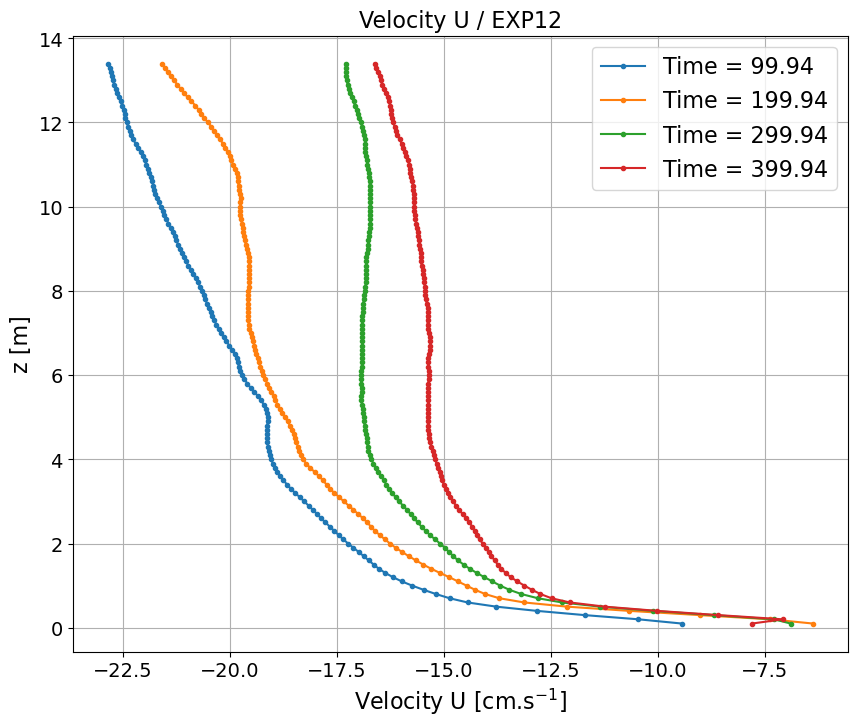

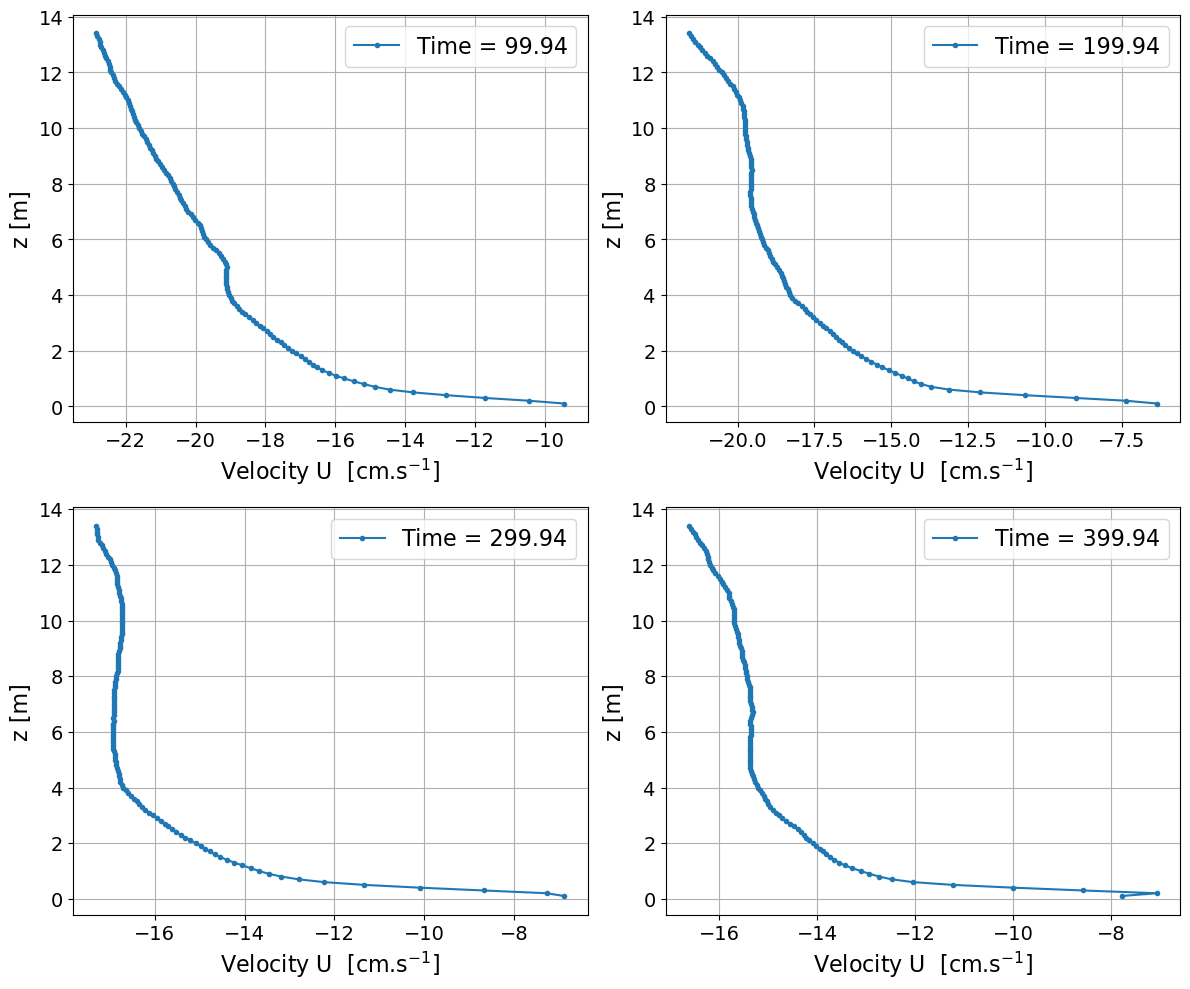

In [7]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(ubar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Velocity U / EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'Velocity U [cm.s$^{-1}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(ubar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Velocity U  [cm.s$^{-1}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()


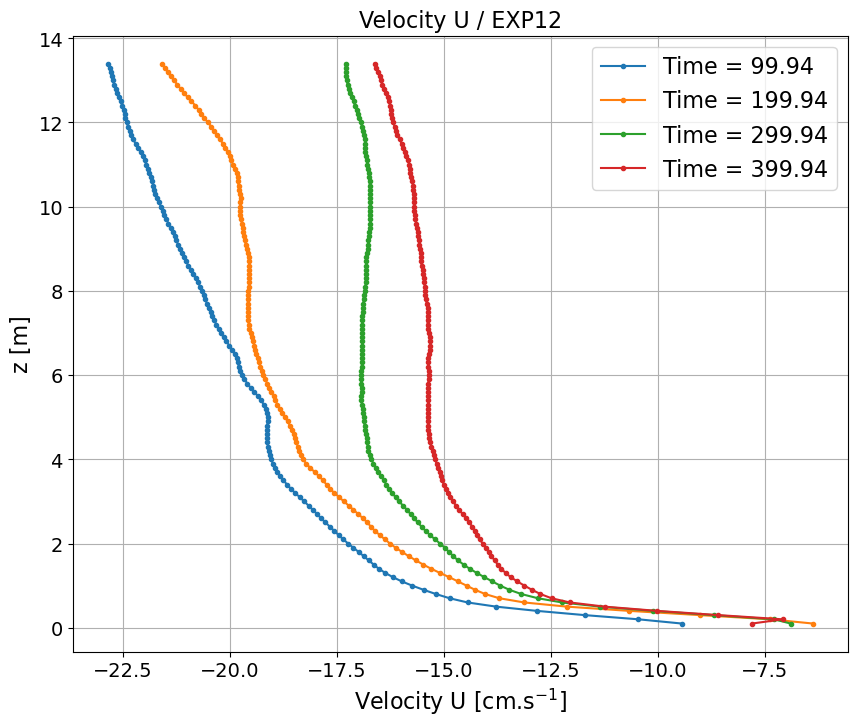

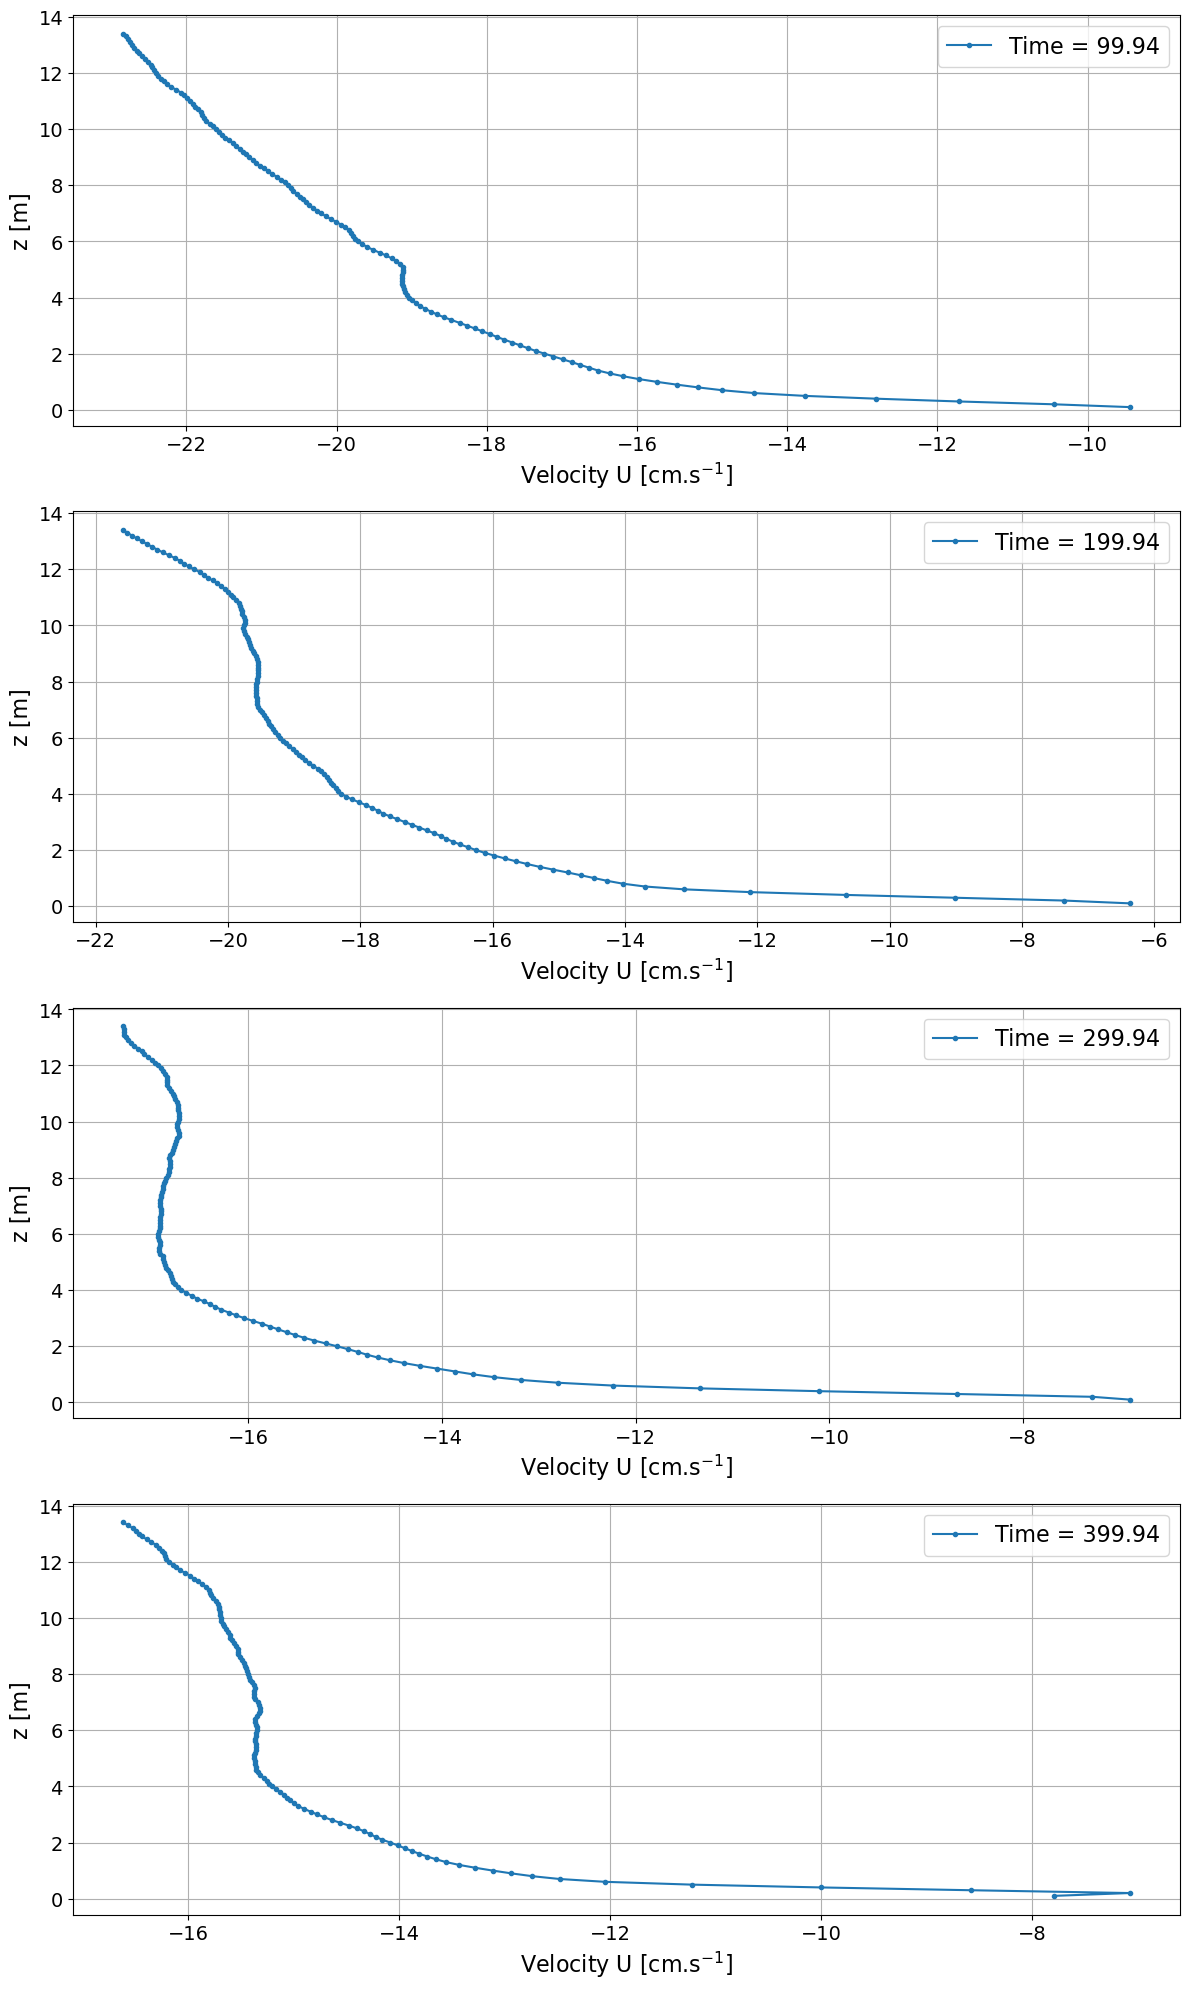

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i] = np.argmin(np.abs(time.data - It[i]))

# Exportation des courbes de vitesse pour les différents moments
for i in idt:
    filename = f'velocity_u_time_{time[i]:.2f}.dat'
    data = np.column_stack((ubar[:, i], Coord_y))
    header = 'Velocity U [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(ubar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Velocity U / EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'Velocity U [cm.s$^{-1}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(4, 1, figsize=(12, 20))

# Tracer les courbes de vitesse pour les différents moments dans les sous-plots
for ax, i in zip(axs, idt):
    ax.plot(ubar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Velocity U [cm.s$^{-1}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()


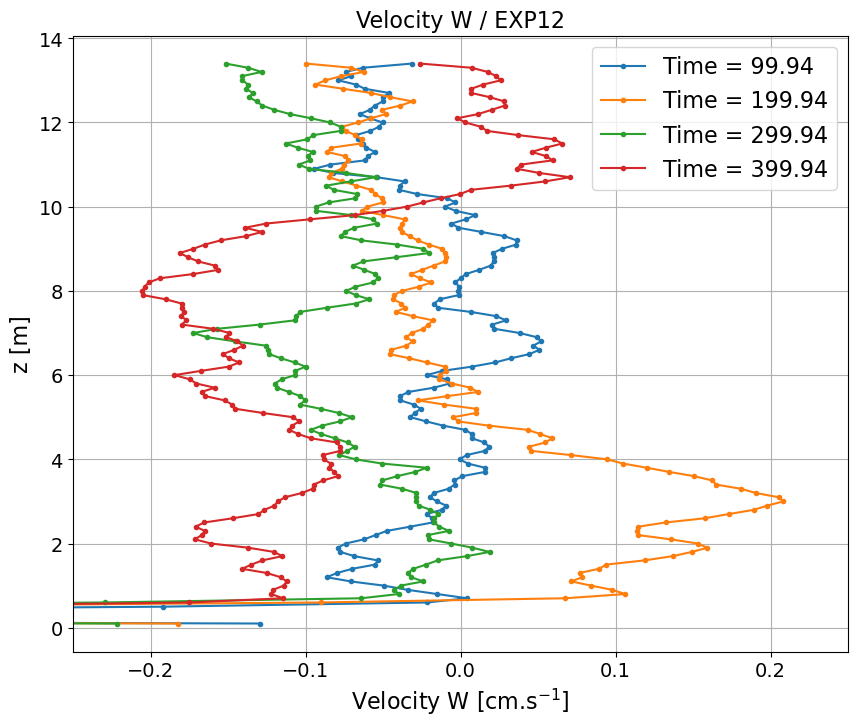

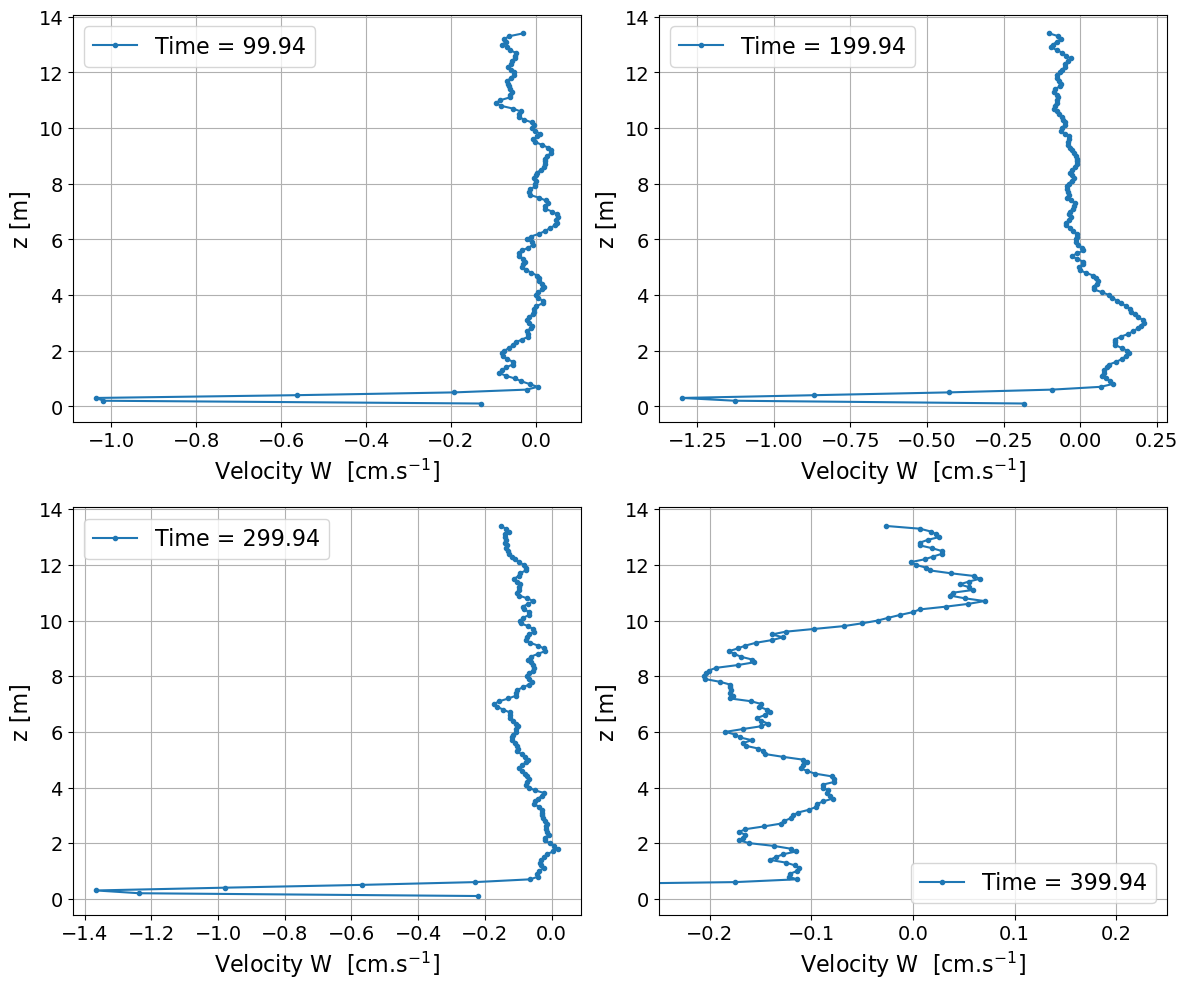

In [38]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

for i in idt:
    filename = f'velocity_w_time_{time[i]:.2f}.dat'
    data = np.column_stack((wbar[:, i], Coord_y))
    header = 'Velocity W [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(wbar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Velocity W / EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
plt.xlim(-0.25,0.25)
ax1.set_xlabel(r'Velocity W [cm.s$^{-1}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(wbar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Velocity W  [cm.s$^{-1}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)
    plt.xlim(-0.25,0.25)
plt.xlim(-0.25,0.25)
# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()


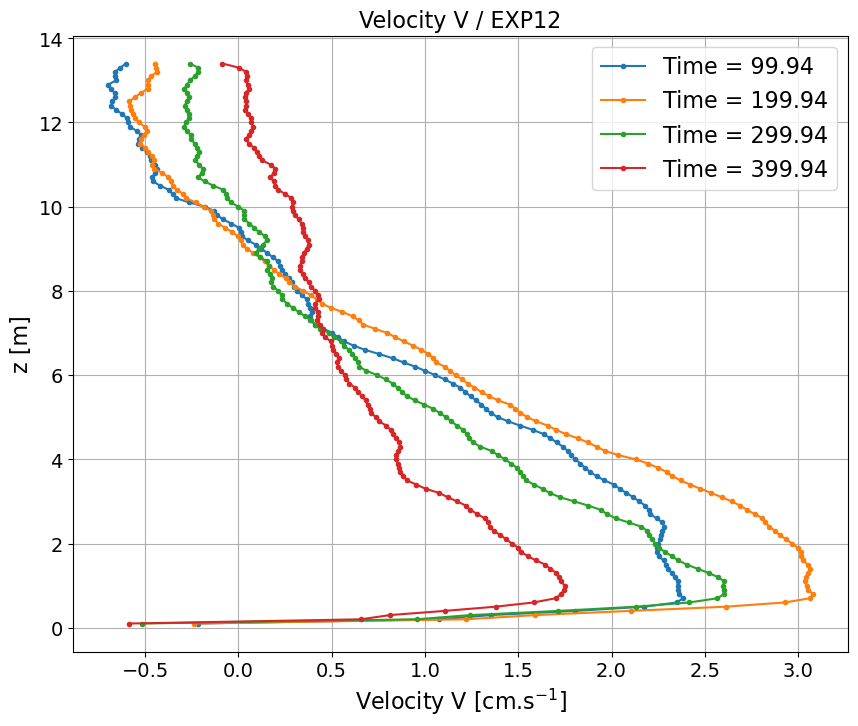

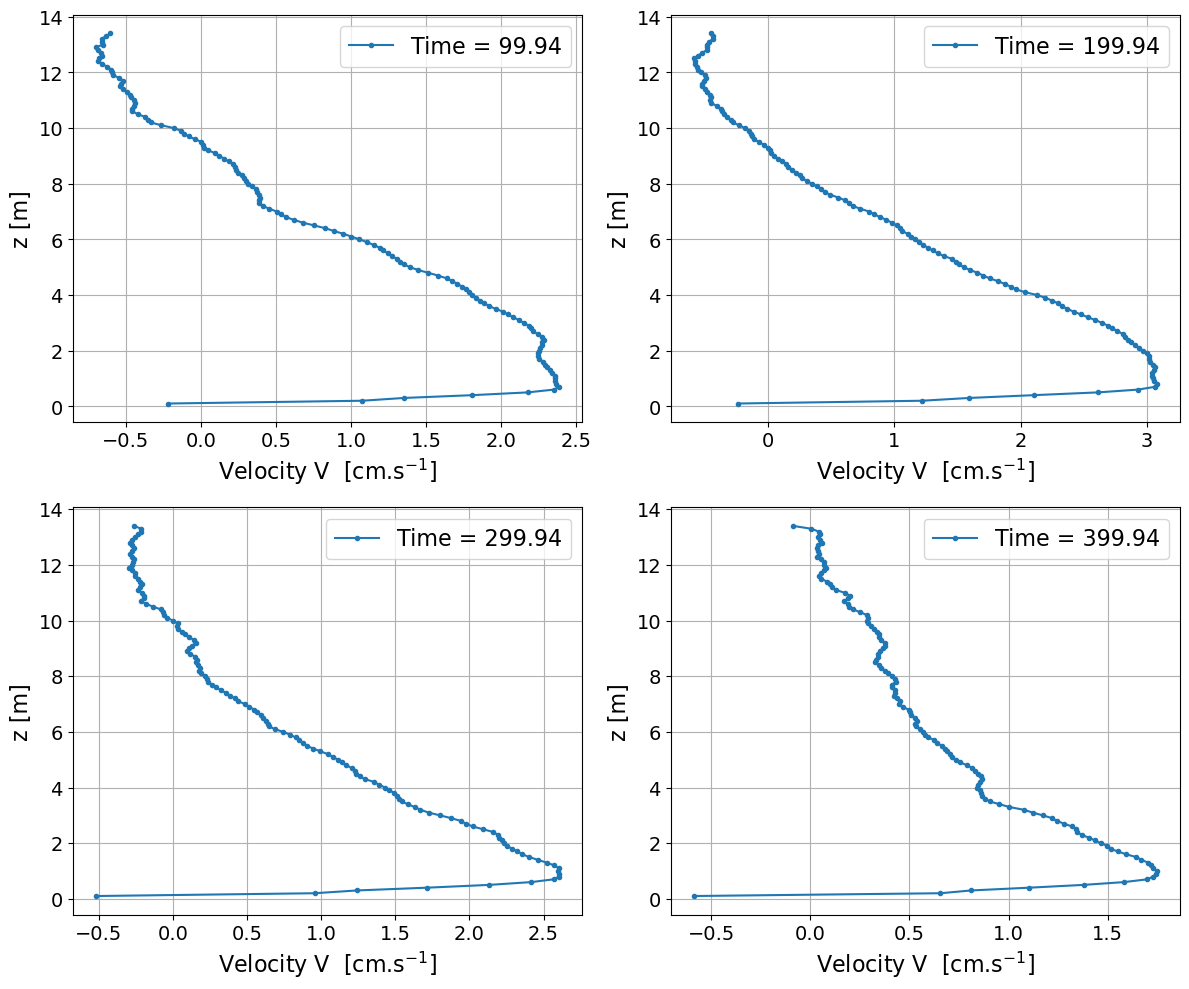

In [29]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

for i in idt:
    filename = f'velocity_v_time_{time[i]:.2f}.dat'
    data = np.column_stack((vbar[:, i], Coord_y))
    header = 'Velocity V [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(vbar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Velocity V / EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'Velocity V [cm.s$^{-1}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(vbar[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Velocity V  [cm.s$^{-1}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()


In [10]:
# For the moment I forgot to get the U (from the PIV in X-Y) from mi matlab scrip. 
# so I have to reconstruct it 

ubar3D  = np.ones_like(uprime) 
for x in range (len(Coord_x)):
   ubar3D[x,:,:] =  ubar[:,:]
U = ubar3D +uprime

U = xr.DataArray(
    U,
    dims=['coord_x', 'coord_y', 'time'],
    coords={'coord_x': Coord_x, 'coord_y': Coord_y},
    name='Ubrut')

vbar3D  = np.ones_like(uprime) 
for x in range (len(Coord_x)):
   vbar3D[x,:,:] =  vbar[:,:]
V = vbar3D +vprime

V = xr.DataArray(
    V,
    dims=['coord_x', 'coord_y', 'time'],
    coords={'coord_x': Coord_x, 'coord_y': Coord_y},
    name='Vbrut')

wbar3D  = np.ones_like(uprime) 
for x in range (len(Coord_x)):
   wbar3D[x,:,:] =  wbar[:,:]
W = wbar3D +wprime

W = xr.DataArray(
    W,
    dims=['coord_x', 'coord_y', 'time'],
    coords={'coord_x': Coord_x, 'coord_y': Coord_y},
    name='Wbrut')

In [11]:
def film_2D(x, y, time, variable,lim_m,lim_p, var_name, var_unit, exp_name, f, N, cmapi, output_file='animation.gif'):
    '''This function computes the displacement thickness.
    Variables: 
    - exp_name : Index of the experiment exemple ('EXP12').
    - var_name : Name of the variable
    - var_unit: 'm.s^{-1}$' if velocity '''

    t_0 = np.argmin(np.abs(time.data))
    
    X,Y = np.meshgrid(y,x)
    
    # Créer la figure
    fig = plt.figure(figsize=(12, 8), tight_layout=True)
    # Création de l'animation
    def animate(i):
        plt.clf()
        #ctf = plt.contourf(Y, X, variable[:,:,i], levels=100, cmap=cmapi)
        ctf = plt.pcolor(Y, X, variable[:,:,i+t_0],  cmap=cmapi)
        plt.xlabel('X [cm]', fontsize=20)
        plt.ylabel('Z [cm]', fontsize=20)
        plt.title(str("Field {} for {} ".format(var_name, exp_name) + f'/ N = {N}, f = {f}/ Time = {time[i+t_0]:.2f}'), fontsize=20)
        plt.colorbar(ctf, shrink=0.8, aspect=20, label='{} [{}]'.format(var_name, var_unit), extend='both')
        ctf.set_clim(lim_m, lim_p)
    # Paramètres de l'animation
    ani = animation.FuncAnimation(fig, animate, frames=(len(time)-t_0), interval=300, blit=False)  # frames = nombre d'images, interval = temps entre chaque image (en millisecondes)
    
    # Sauvegarde de l'animation au format .avi
    ani.save(output_file, writer='ffmpeg', fps=30, dpi=200)
    
    return ani

#ani = film_2D(Coord_x,Coord_y, time ,U,1,-25, 'U', 'm.s$^-{1}$', 'EXP12', f_fin,N,cmap1, output_file='U_EXP12.mp4')
#HTML(ani.to_jshtml())

## Vorticity

In [12]:
## Creation of the dynamical quantity field, (vorticity, Okumo-wiess etc)

vorticity_z  = np.gradient(W,axis=0)/dx-np.gradient(U,axis=1)/dy



In [13]:
#ani = film_2D(Coord_x,Coord_y, time ,vorticity_z,np.nanmax(vorticity_z),np.nanmin(vorticity_z) '$\zeta$', 's$^-{1}$', 'EXP12', f_fin,N,cmap3, output_file='Vorticity_EXP12.mp4')
#HTML(ani.to_jshtml())

In [14]:
vorticity_mean = np.zeros_like(ubar)
for it in range(time.size):
    vorticity_mean[:,it] = np.nanmean(vorticity_z[:,:,it], axis  =0)


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33607/1558924900.py:3: RuntimeWarning: Mean of empty slice
  vorticity_mean[:,it] = np.nanmean(vorticity_z[:,:,it], axis  =0)


In [15]:
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 
idt

array([ 705, 1205, 1705, 2205])

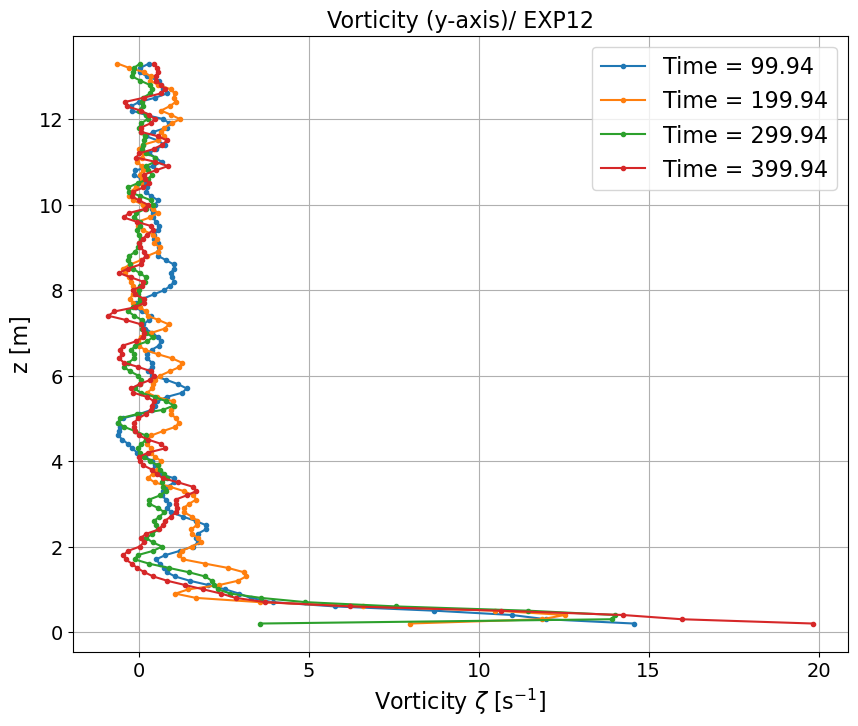

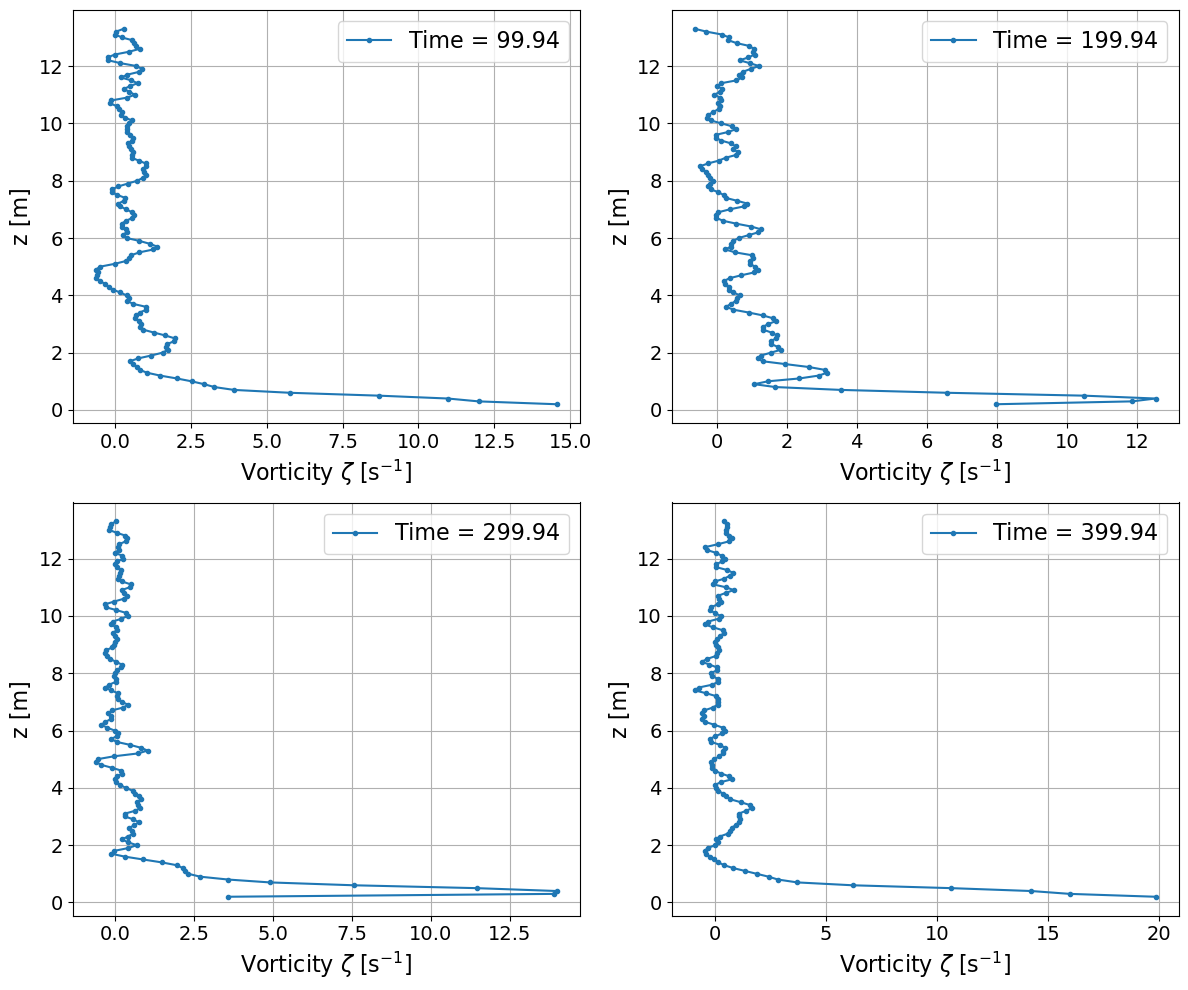

In [16]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(vorticity_mean[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Vorticity (y-axis)/ EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'Vorticity $\zeta$ [s$^{-1}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(vorticity_mean[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Vorticity $\zeta$ [s$^{-1}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()


In [17]:
#ani = create_animation(time[t_0:], vorticity_mean, Coord_y,'Vertical profil of vorticity' ,r'Vorticity $\zeta$ [s$^{-1}$]', 'z [cm]', output_file='Profil_vorticity_EXP12.mp4')


## Okubo-Weiss

- _Vorticity_ = $\partial_x W - \partial_y U$
- _Divergence_ = $\partial_x U+\partial_y W$
- _Shear_ = $\partial_x W+\partial_y U$
- _Stretching_ = $\partial_x U-\partial_y W$

OW = shear$^2$ + stretching$^2$ -vorticity$^2$

In [18]:
dx_U = np.gradient(U,axis=0)/dx
dx_W = np.gradient(W,axis=0)/dx
dy_U = np.gradient(U,axis=1)/dy
dy_W = np.gradient(W,axis=1)/dy

vor = dx_W - dy_U
div = dx_U+dy_W
shear = dx_W+dy_U
stretching = dx_U-dy_W

OW = shear**2 + stretching**2 -vor**2

In [19]:
OW_mean = np.zeros_like(ubar)
for it in range(time.size):
    OW_mean[:,it] = np.nanmean(OW[:,:,it], axis  =0)


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_33607/527379344.py:3: RuntimeWarning: Mean of empty slice
  OW_mean[:,it] = np.nanmean(OW[:,:,it], axis  =0)


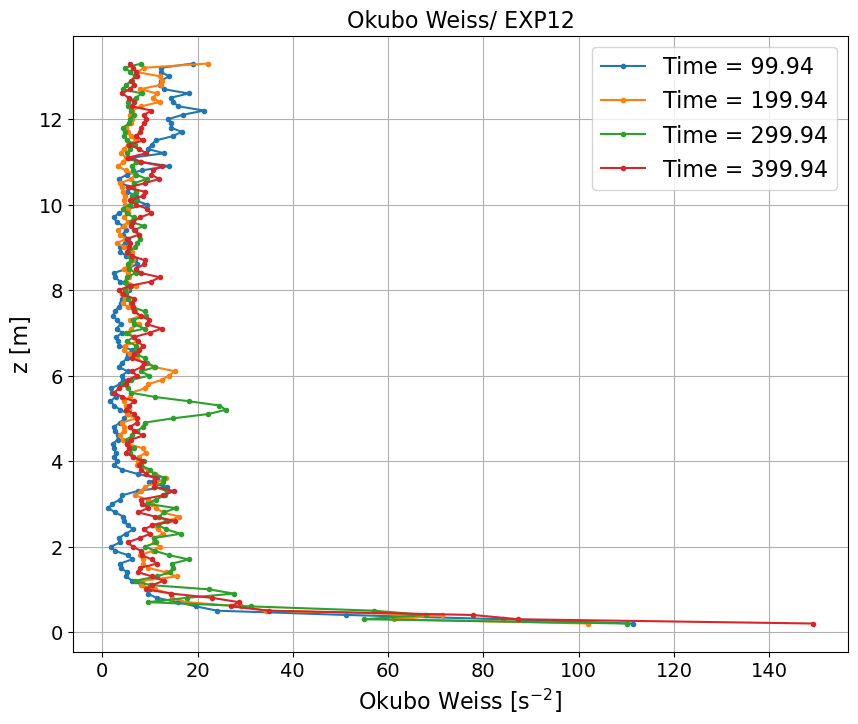

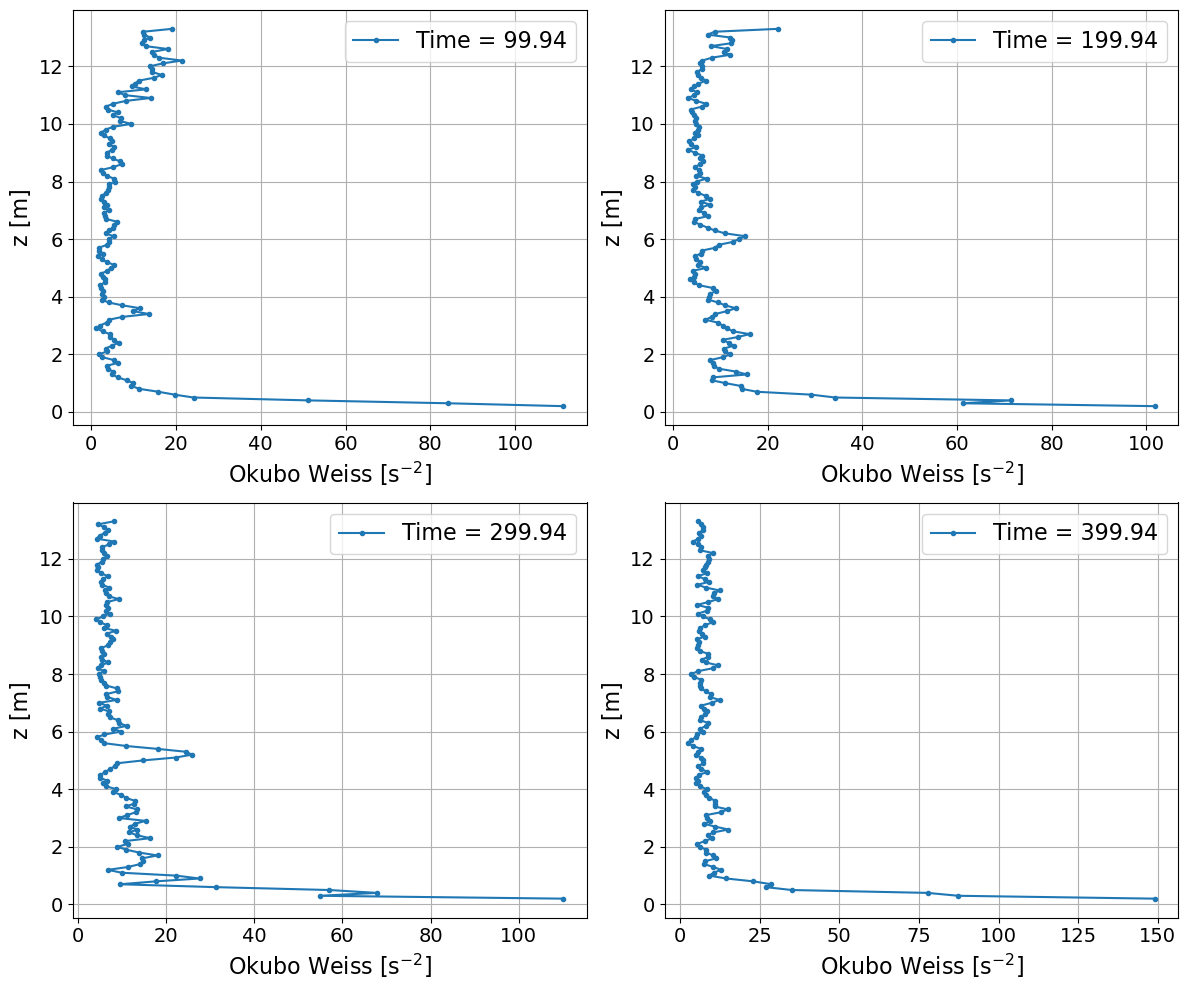

In [20]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(OW_mean[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title('Okubo Weiss/ EXP12', fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'Okubo Weiss [s$^{-2}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(OW_mean[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'Okubo Weiss [s$^{-2}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()

In [21]:
#ani = create_animation(time, OW_mean, Coord_y,'Vertical profil of Okubo-Weiss' ,r'Okubo-weiss [s$^{-2}$]', 'z [cm]', output_file='Profil_Okubo-Weiss_EXP12.mp4')
#HTML(ani.to_jshtml())

# Turbulence


In [22]:
#uprime_mean = np.zeros_like(ubar)
#wprime_mean = np.zeros_like(ubar)
#for it in range(time.size):
#    uprime_mean[:,it] = np.nanmean(uprime[:,:,it], axis  =0)
#    wprime_mean[:,it] = np.nanmean(wprime[:,:,it], axis  =0)
    

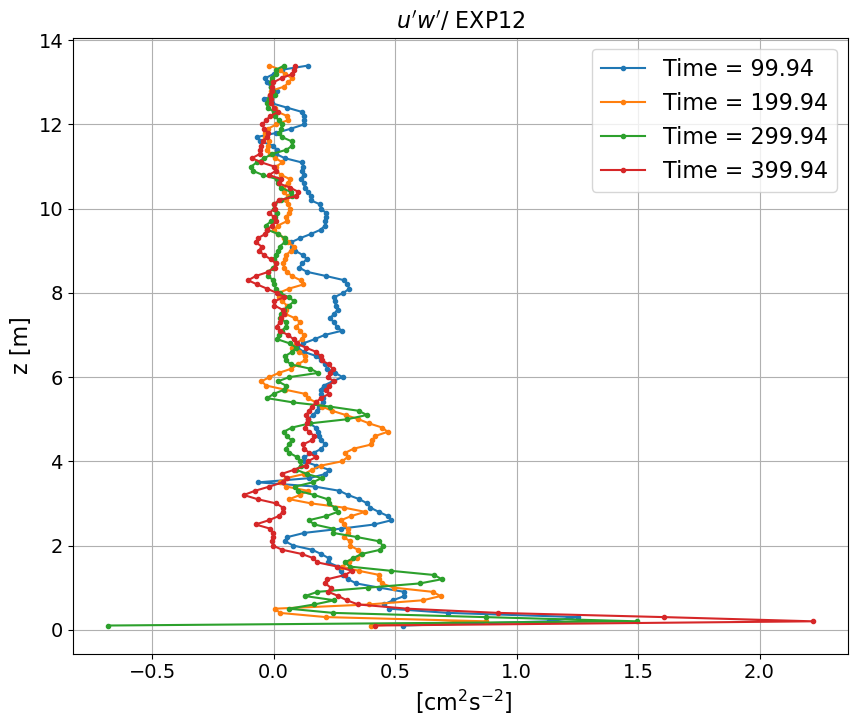

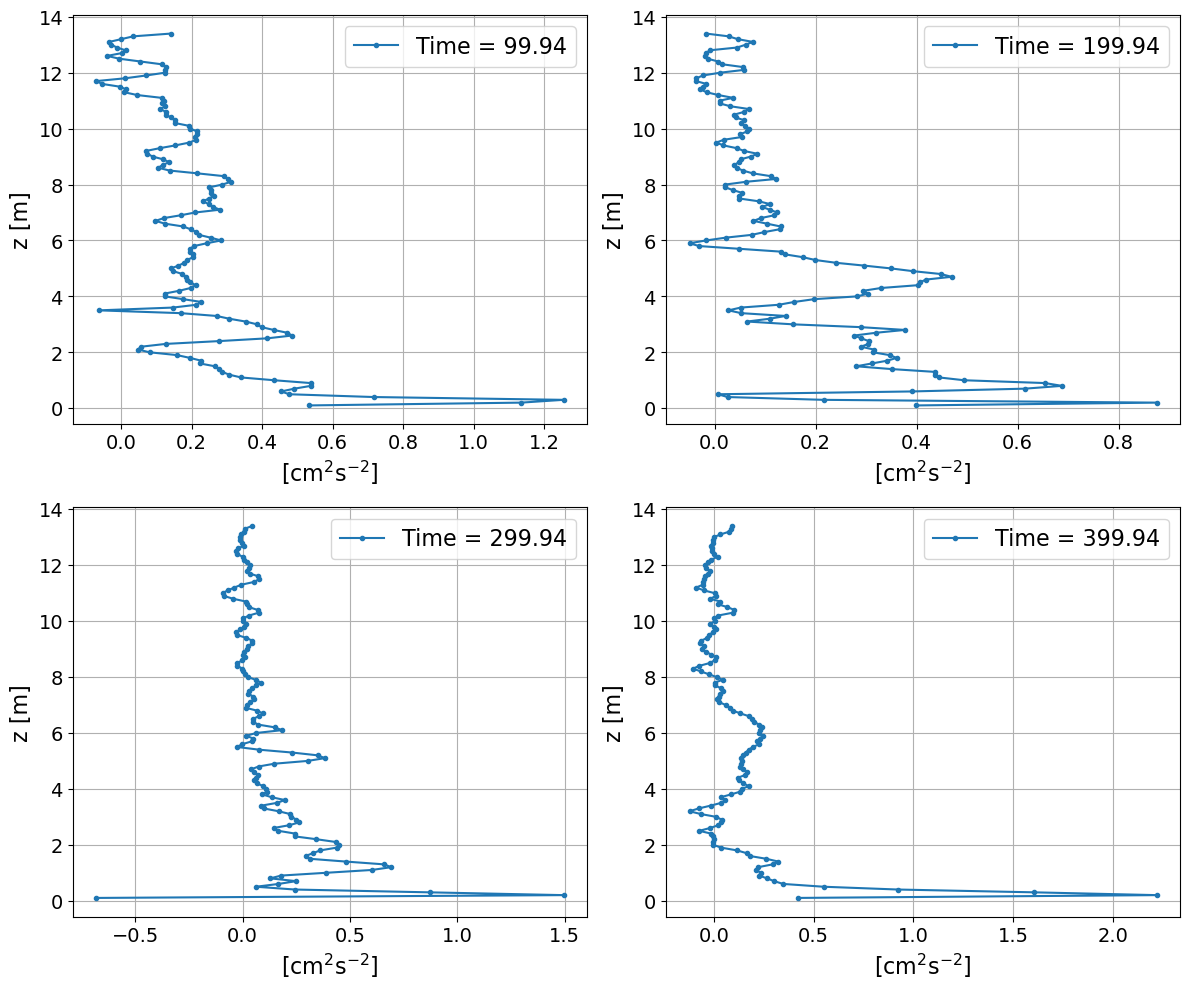

In [30]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 


for i in idt:
    filename = f'turbulence_uw_time_{time[i]:.2f}.dat'
    data = np.column_stack((uw[:, i], Coord_y))
    header = 'Turbulence uw [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')
# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(uw[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title("$u'w'$/ EXP12", fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r' [cm$^{2}$s$^{-2}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracer les courbes de vorticité pour les différents moments dans les sous-plots
for ax, i in zip(axs.flat, idt):
    ax.plot(uw[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'[cm$^{2}$s$^{-2}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()

In [25]:
np.sqrt(0.8)

0.8944271909999159

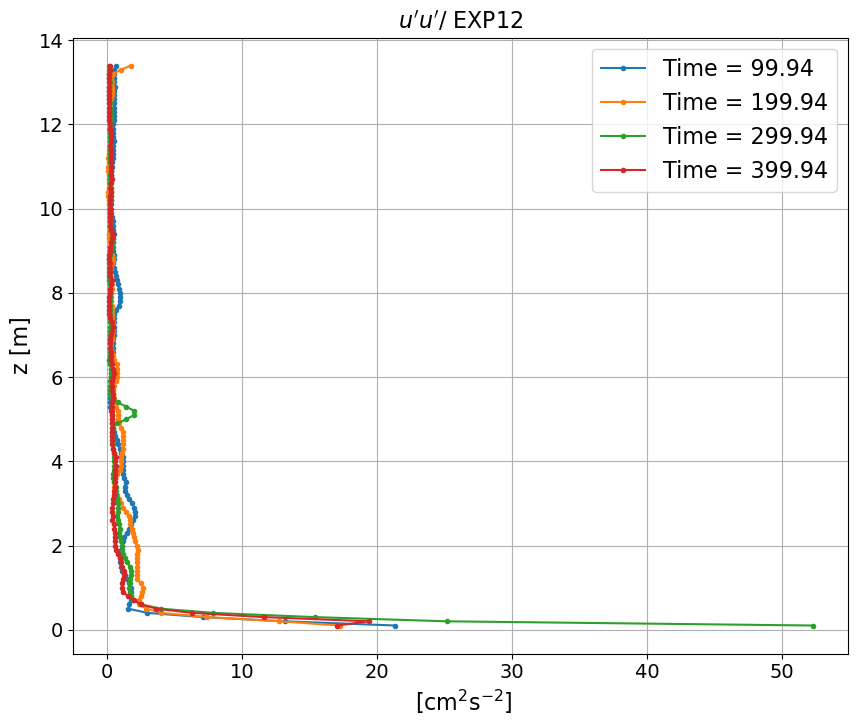

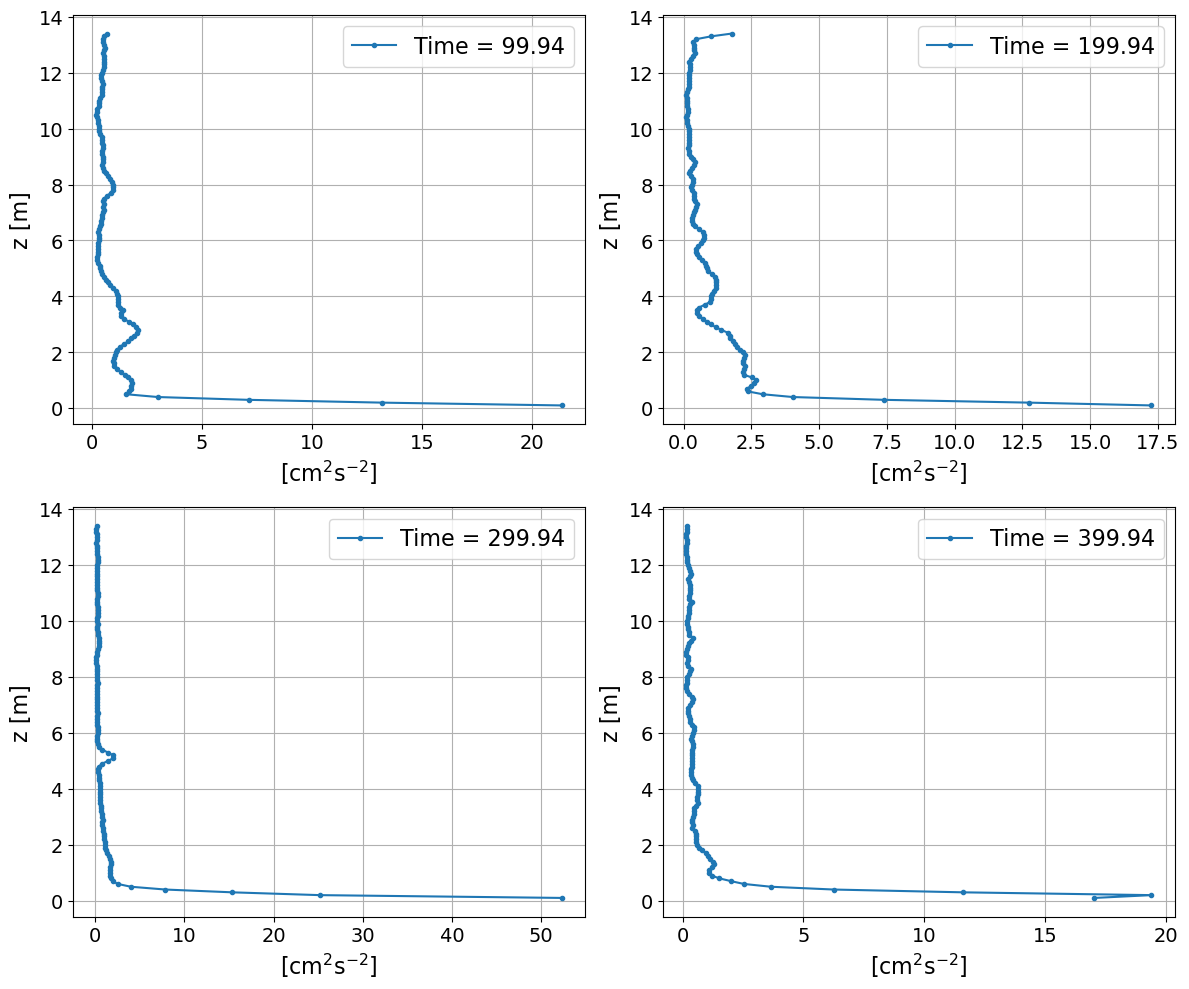

In [31]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

for i in idt:
    filename = f'turbulence_uu_time_{time[i]:.2f}.dat'
    data = np.column_stack((uu[:, i], Coord_y))
    header = 'Turbulence uu [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')

# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(uu[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title("$u'u'$/ EXP12", fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r' [cm$^{2}$s$^{-2}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))


for ax, i in zip(axs.flat, idt):
    ax.plot(uu[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'[cm$^{2}$s$^{-2}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()

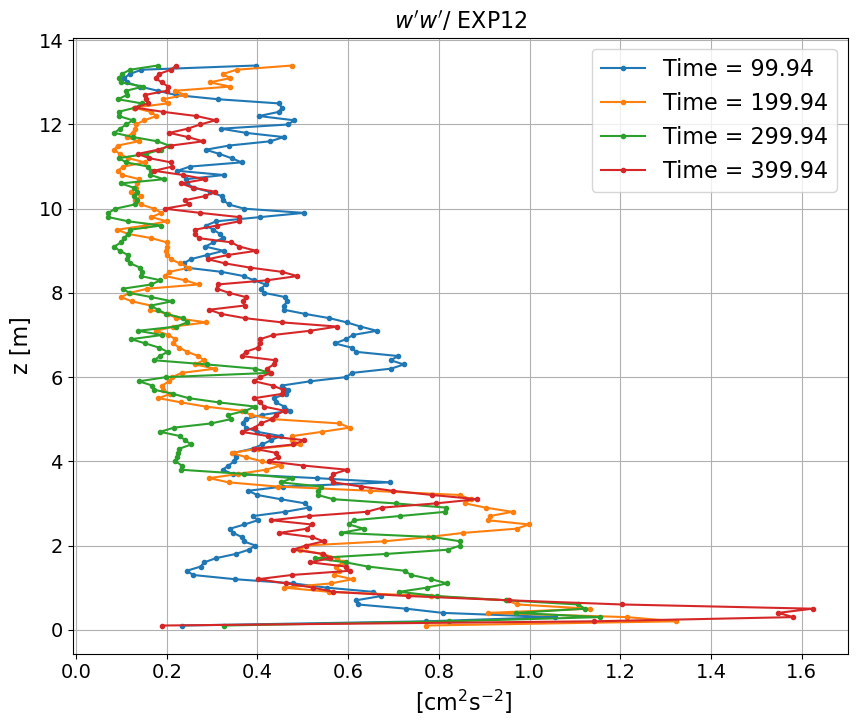

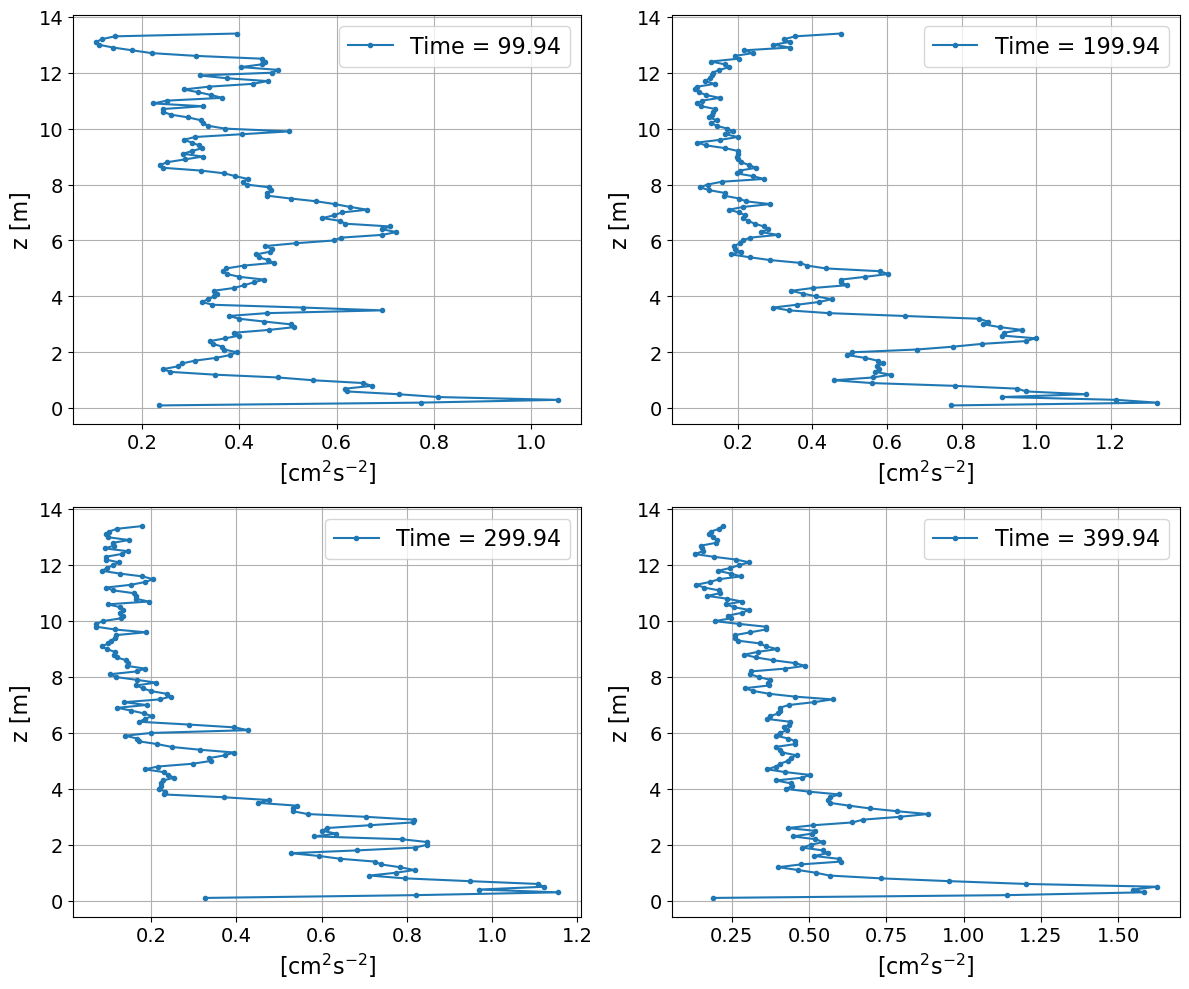

In [32]:
# Les indices de temps spécifiques à tracer
It = [100, 200, 300, 400]
idt = np.zeros_like(It)
for i in range(len(It)):
    idt[i]= np.argmin(np.abs(time.data-It[i])) 

for i in idt:
    filename = f'turbulence_ww_time_{time[i]:.2f}.dat'
    data = np.column_stack((ww[:, i], Coord_y))
    header = 'Turbulence ww [cm.s^{-1}]    z [m]'
    np.savetxt(filename, data, header=header, comments='', fmt='%.6f')
# Création de la figure pour le graphique principal
fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in idt:
    ax1.plot(ww[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')

ax1.grid()
ax1.set_title("$w'w'$/ EXP12", fontsize=16)
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r' [cm$^{2}$s$^{-2}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots
fig2, axs = plt.subplots(2, 2, figsize=(12, 10))


for ax, i in zip(axs.flat, idt):
    ax.plot(ww[:, i], Coord_y, '.-', label=f'Time = {time[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r'[cm$^{2}$s$^{-2}$]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()

## Observation rotation

In [74]:
ubar

<xarray.DataArray 'Ubar' (coord_y: 141, Time: 5000)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [-0.622254, -0.543546, -0.60199 , ..., -5.223368, -5.435167, -5.546773],
       [-0.359605, -0.326376, -0.35294 , ..., -4.292896, -4.379762, -4.442831],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * Time     (Time) float32 -41.06 -40.86 -40.66 -40.46 ... 958.3 958.5 958.7
  * coord_y  (coord_y) float32 0.0 0.1 0.2 0.3 0.4 ... 13.6 13.7 13.8 13.9 14.0

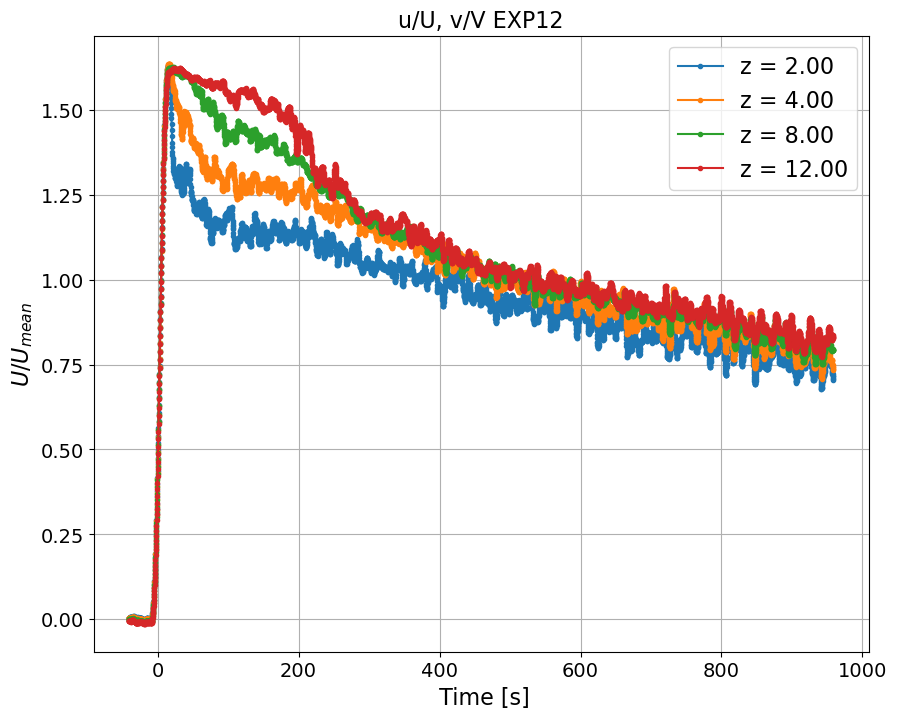

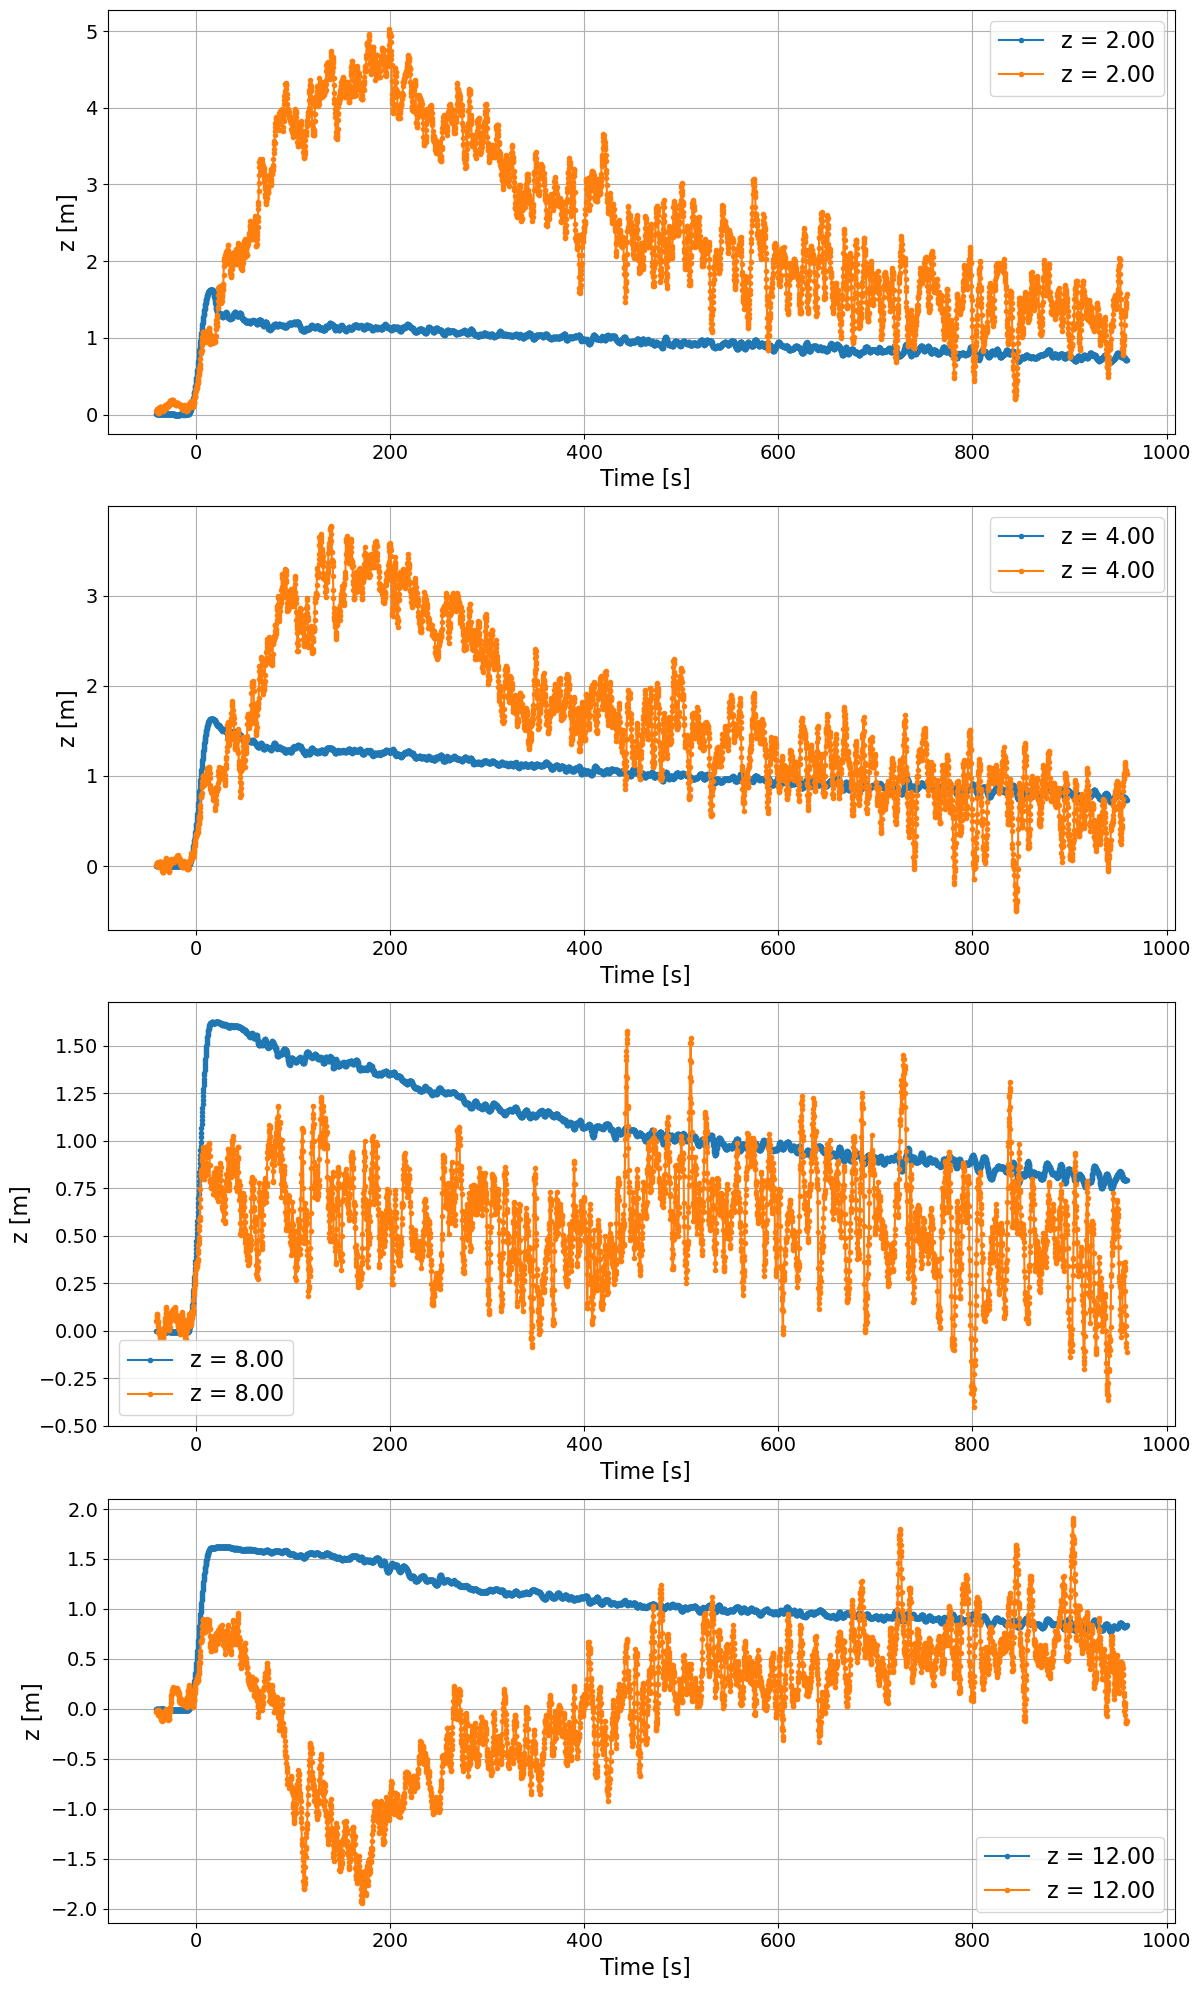

In [80]:
u_mean = np.nanmean(ubar)
v_mean = np.nanmean(vbar)

# Les indices de temps spécifiques à tracer
iy = [20, 40, 80, 120]


fig1, ax1 = plt.subplots(figsize=(10, 8))
for i in iy:
    ax1.plot(time, ubar[i,:]/u_mean, '.-', label=f'z = {Coord_y[i]:.2f}')
    ax.plot(time, vbar[i,:]/v_mean, '.-', label=f'z = {Coord_y[i]:.2f}')
ax1.grid()
ax1.set_title("u/U, v/V EXP12", fontsize=16)
ax1.set_ylabel(r'$U/U_{mean}$', fontsize=16)
ax1.set_xlabel(r' Time [s]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(fontsize=16)

# Création de la figure pour les quatre sous-plots en une seule colonne
fig2, axs = plt.subplots(4, 1, figsize=(12, 20))  # 4 lignes, 1 colonne

for ax, i in zip(axs, iy):
    ax.plot(time, ubar[i,:]/u_mean, '.-', label=f'z = {Coord_y[i]:.2f}')
    ax.plot(time, vbar[i,:]/v_mean, '.-', label=f'z = {Coord_y[i]:.2f}')
    ax.grid()
    ax.set_ylabel('z [m]', fontsize=16)
    ax.set_xlabel(r' Time [s]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=16)

# Ajuster les sous-plots pour éviter les chevauchements
plt.tight_layout()

# Afficher les figures
plt.show()

#  Boundary layer

## Displacement thickness 


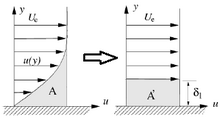

Source :https://fr.wikipedia.org/wiki/Couche_limite#/media/Fichier:Param%C3%A8tres_caract%C3%A9ristiques_de_la_couche_limites.png



If we consider A and A' to be surfaces such that : 
$A = \int_{0}^{\infty} (U_{\infty} - u)  dy = A' = \delta_{1} U_{\infty} $.

Assuming $A=A'$, the _displacement thickness_ can be written as 
$$\delta_{1} = \frac{\int_{0}^{\infty} (U_{\infty} - u)}{U_{\infty}} dy$$ 



**Reference** : Course _"Turbulence, diffusion and transport: Master Environmental Fluid Mechanics"_ **Joel Sommeria** p p90


In [35]:
def delta_exp(num_exp,cam ):
    '''This function is aim to compute the displacement thickness: 
    Variable: 
    name_exp must be a string in the format 'EXPXX'  
    cam must by either jai or stereo'''

    time =  time
    u    = -ubar_stereo[num_exp]
    dy   =  dy_stereo
    y    =  Coord_y_stereo
    ny   =  Coord_y_stereo.size


    
    # Declaration of the outpu variables
    d1     = np.zeros(time.size)
    d95_1  = np.zeros(time.size) ; d95_2  = np.zeros(time.size)
    Uout   = np.zeros(time.size)
    
    
    #main programm
    for it in range (time.size):
        Umax = np.nanmax(u[:,it])
        idMax = (np.int64(np.where(u[:,it] == Umax)))[0][0]    # I look for the  maximum of velocity (in case of a buldge in presence of rotation)
        if cam == 'jai' : 
            Uinfty = np.nanmean(u[-40:,it],axis = 0)      # mean over the last 4cm por the JAI 
            Uout[it] = Uinfty
        elif cam=='stereo'  :
            Uinfty = np.nanmean(u[-10:,it],axis = 0)     # mean over the last 1cm por the Stereo
            Uout[it] = Uinfty    
        else : 
            print("'The variable (cam) must by either 'jai' or 'stereo''")
        #return   "The variable (cam) must by either 'jai' or 'stereo'"


        # With this condition we look if the maximum of the velocity is situated in the lower part of the column, 
        # If so we must 
        
        if idMax < 2 * ny // 3: 
            valid_indices_1 = np.arange(idMax + 1, len(u[:, it]))            # We only loof above the buldge 
            valid_values_1 = np.abs(u[valid_indices_1, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_1)):
                id95_1 = -1  # Indicate no valid index found
            else:
                valid_values_1 = np.where(np.isnan(valid_values_1), np.inf, valid_values_1)
                id95_1 = valid_indices_1[np.nanargmin(valid_values_1)]

            valid_indices_2 = np.arange(0, idMax)                           # Here we look bellow 
            valid_values_2 = np.abs(u[valid_indices_2, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_2)):
                #print(f"All values are NaN in the range < idMax for it = {it}")
                id95_2 = -1  # Indicate no valid index found
            else:
                valid_values_2 = np.where(np.isnan(valid_values_2), np.inf, valid_values_2)
                id95_2 = valid_indices_2[np.nanargmin(valid_values_2)]

            if id95_1 != -1:
                d95_1[it] = y[id95_1]
            else:
                d95_1[it] = np.nan  # Or any value to indicate NaN condition

            if id95_2 != -1:
                d95_2[it] = y[id95_2]
            else:
                d95_2[it] = np.nan  # Or any value to indicate NaN condition
        
        else : 
            
            id95_1 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            id95_2 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            d95_1[it] = y[id95_1]
            d95_2[it] = y[id95_2]
            
        
        d1[it]  = np.sum((1 - u[:,it]/Uinfty)*dy)
    return d1, d95_1,d95_2, Uout

#cam = 'stereo'
#exp_num='EXP12'

#d1, d95_1,d95_2,Uinfty = delta_exp(exp_num,cam )

In [36]:
cam = 'jai'   
for exp in nexp_jai :
    exp_num=str('EXP'+exp)
    d1_jai[str('EXP'+exp)]      = delta_exp(exp_num,cam)[0]
    d95_1_jai[str('EXP'+exp)]   = delta_exp(exp_num,cam)[1]
    d95_2_jai[str('EXP'+exp)]   = delta_exp(exp_num,cam)[2]
    Uinfty_jai[str('EXP'+exp)]  = delta_exp(exp_num,cam)[3]
    
cam = 'stereo'   
for exp in nexp_stereo :
    exp_num=str('EXP'+exp)
    d1_stereo[str('EXP'+exp)]      = delta_exp(exp_num,cam)[0]
    d95_1_stereo[str('EXP'+exp)]   = delta_exp(exp_num,cam)[1]
    d95_2_stereo[str('EXP'+exp)]   = delta_exp(exp_num,cam)[2]
    Uinfty_stereo[str('EXP'+exp)]  = delta_exp(exp_num,cam)[3]

NameError: name 'nexp_jai' is not defined

In [34]:
# Decaying law
#alpha1 = 0.126
#lim_rot1 = (1.17*2 / f['EXP16'])*alpha1


filename = f'velocity_U_timeserie_14cm.dat'
data = np.column_stack((Uinfty_stereo['EXP12'], time_stereo['EXP12']))
header = 'Time serie of Uinfiny (14cm) u [cm.s^{-1}]    t [s]'
np.savetxt(filename, data, header=header, comments='', fmt='%.6f')


plt.figure(figsize=(15,8))
plt.title(r'$U_{\infty}$', fontsize=18)
plt.plot(time_stereo['EXP12'],Uinfty_stereo['EXP12'],label= 'EXP12')

plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'Velocity [cm.s$^{-1}$] ', fontsize=16)
#plt.ylim(-1,4)
#plt.xlim(0,time_stereo['EXP12'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



NameError: name 'Uinfty_stereo' is not defined

This cutter shows the evolution of the velocity away from the wall, the balance of the angular momentum of the fluid column. The rate of change of angular momentum is equal to the torque applied to the fluid. We then find an exponential rate of decrease in velocity (see **Sous et al, 2013**) for the thorytical developpement

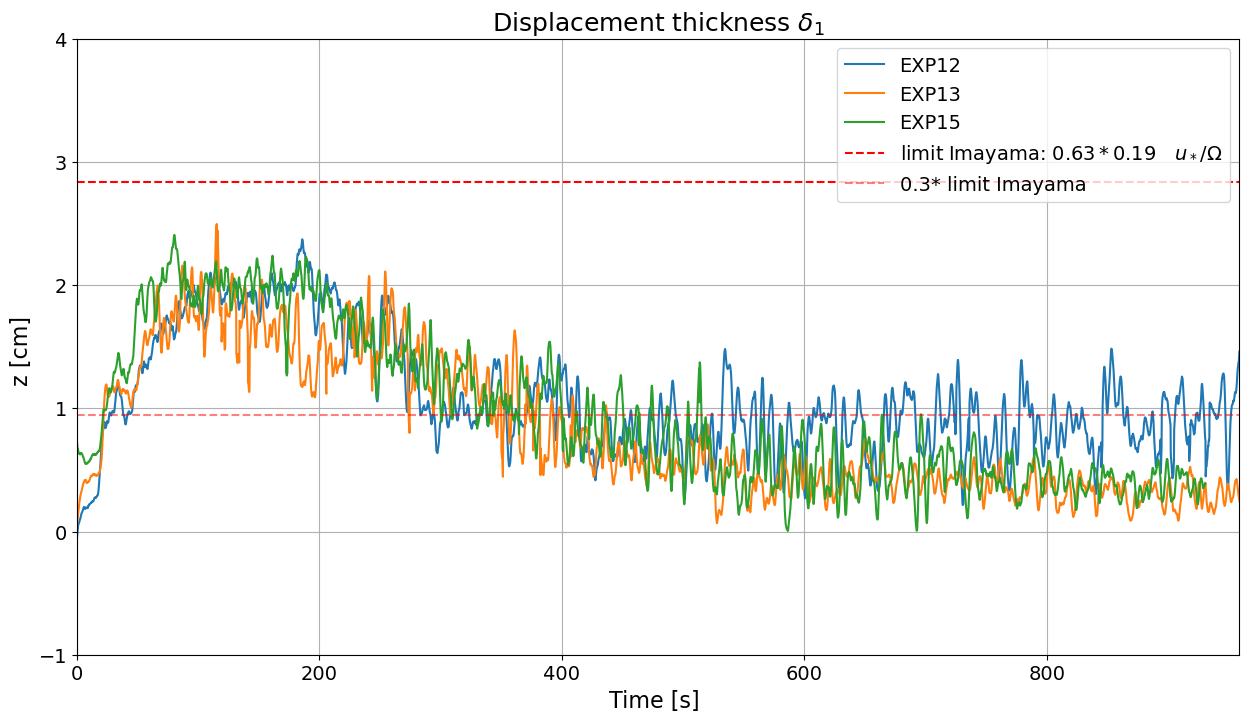

In [10]:
# Diplacement thickness depending on the stratification
alpha1 = 0.126
lim_rot1 = (1.17*2 / f['EXP16'])*alpha1

plt.figure(figsize=(15,8))
plt.title(r'Displacement thickness $\delta_1$', fontsize=18)
plt.plot(time_stereo['EXP12'],d1_stereo['EXP12'],label= 'EXP12')
plt.plot(time_stereo['EXP13'],d1_stereo['EXP13'],label= 'EXP13')
plt.plot(time_stereo['EXP15'],d1_stereo['EXP15'],label= 'EXP15')
plt.axhline(y=lim_rot1, color='red', linestyle='--', label=r'limit Imayama: $0.63*0.19 \quad u_*/\Omega$')
plt.axhline(y=lim_rot1/3, color='red',alpha=0.5, linestyle='--', label=r'0.3* limit Imayama')
plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(-1,4)
plt.xlim(0,time_stereo['EXP12'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



We can see that for all the spin up experiments **without initial rotation** there is initially an increase in displacement thickness and then stabilisation. 

**The initial growth seems to follow a $\sqrt{t}$ law**, (see the following log-log graph) and, as expected, is independant on the stratification. The conservation of momentum for a rectiligne mouvement would require a linear growth wich is not the case, that means the cylindrical shape of the plateform induce a convertion of the momentum. (**Maybe try to plot the sum of the displacement thikness for u and for v ?** )

This state of equilibrium seems to be more variable for Exp 12 and to a lesser extent EXP 15. These two experiments have a stratification (N(EXP12) $\gg$ N(EXP12)). We could therefore think of ossilation due to internal waves, **this remains to be confirmed**. 


The red curves is the empirical limits of the growth of the displacement thikness above a rotating-disk 
$$\delta_1 = 0.63*0.19  \quad u_*/\Omega$$
(**ref:** Table1 _Imayama et al., 2014_) 

The lighter red curve is the same limit with a factor 1/3 which we also observe bellow when we compare the **Pollard's growth law** and the the initial growth of EXP12. 

All three curves are stoped around 2cm by the diffusion of momentum, then decrease more linearly, until it reach a quasi thershold (the slight decay is certainly to the slow decay of $u_*$)

There is two ways to consider that:
    
1. We consider the normal Imayama limit then **the stabilisation of the turbulent boundary layer by the effect of rotation occurs earlier (is lower) in our case of a closed geometry** than in the case of a rotating disc and therefore with open edges. and an other regim would explaine what happend after 200s
    
2. We consider the 0.3 Imayama limit at long time and this bump can be explained by a somewhat _diffusion of the rotation effect_. By this I mean it taks time for the entire layer to "feel" rotation and thus there is an continuous adjustment (growth) of $\omega$ since we  are reasoning in an integral way. And therefore of a progressive lowering of this limit to reach this final value 





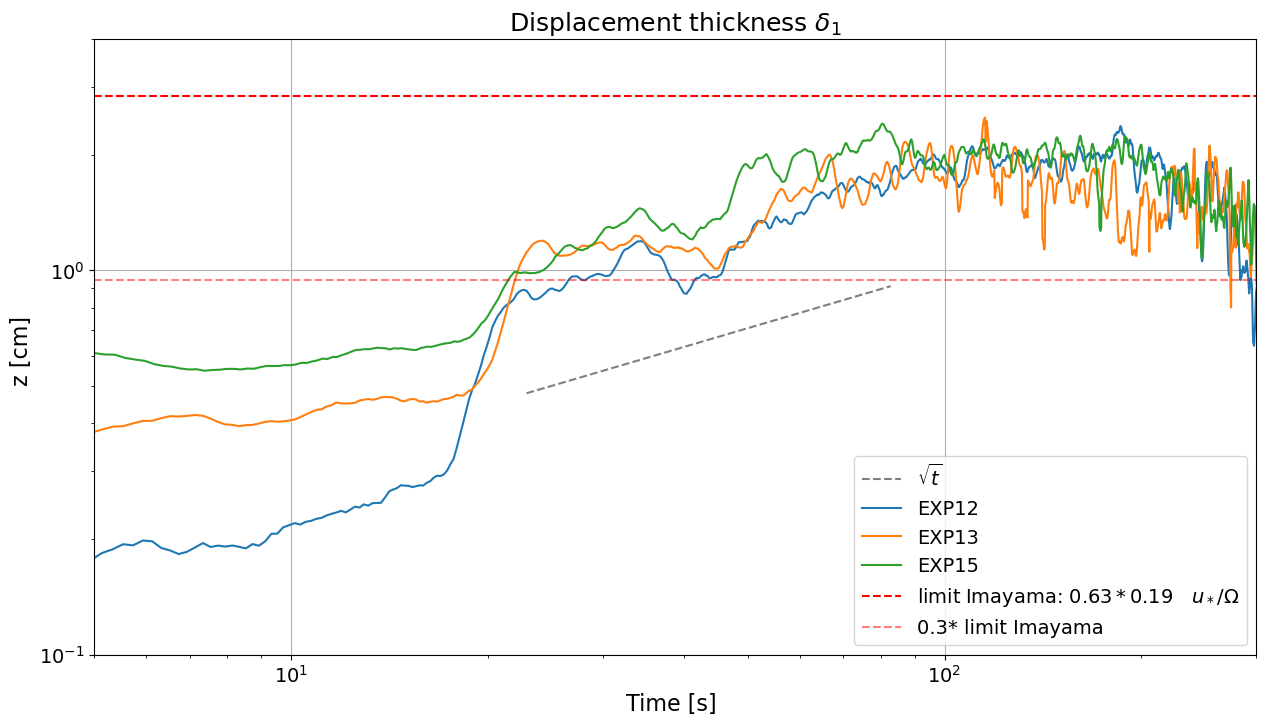

In [11]:
# Diplacement thickness depending on the stratification
alpha1 = 0.126
lim_rot1 = (1.17*2 / f['EXP16'])*alpha1
t_1 = (time_stereo['EXP12'])**(1/2)*(0.1)

plt.figure(figsize=(15,8))
plt.title(r'Displacement thickness $\delta_1$', fontsize=18)
plt.plot(time_stereo['EXP12'][320:620],t_1[320:620], '--',color='k',alpha=0.5,label= r'$\sqrt{t}$')
plt.plot(time_stereo['EXP12'],d1_stereo['EXP12'],label= 'EXP12')
plt.plot(time_stereo['EXP13'],d1_stereo['EXP13'],label= 'EXP13')
plt.plot(time_stereo['EXP15'],d1_stereo['EXP15'],label= 'EXP15')
plt.axhline(y=lim_rot1, color='red', linestyle='--', label=r'limit Imayama: $0.63*0.19 \quad u_*/\Omega$')
plt.axhline(y=lim_rot1/3, color='red',alpha=0.5, linestyle='--', label=r'0.3* limit Imayama')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(0.1,4)
plt.xlim(5,300)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



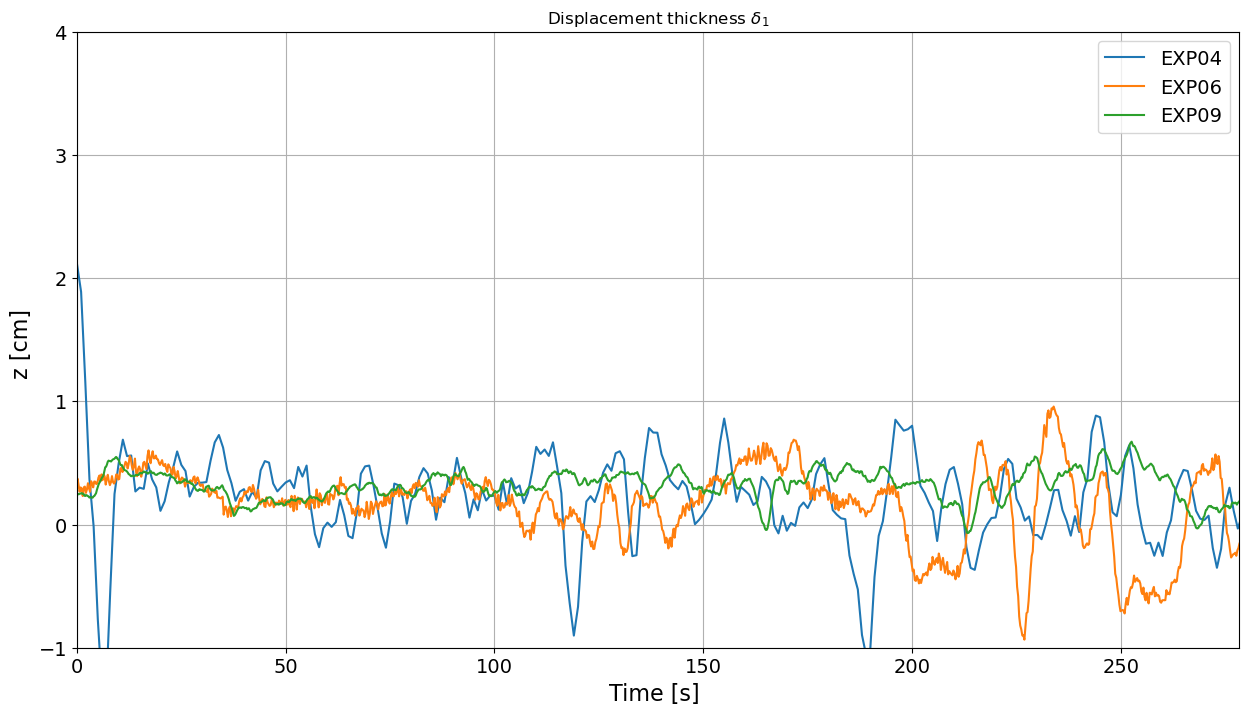

In [12]:
# Diplacement thickness depending on the rotation


plt.figure(figsize=(15,8))
plt.title(r'Displacement thickness $\delta_1$')
plt.plot(time_jai['EXP04'],d1_jai['EXP04'],label= 'EXP04')
plt.plot(time_jai['EXP06'],d1_jai['EXP06'],label= 'EXP06')
plt.plot(time_jai['EXP09'],d1_jai['EXP09'],label= 'EXP09')
plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(-1,4)
plt.xlim(0,time_jai['EXP09'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



The interpretation of the spinning case is much more complicated because in the definition of the _thickness of displacement_ we calculate the integral of the area A but in the case of a spin up with rotation we have a maximum speed which is located near the wall, (a bulge) which is faster than the speed at infinity. This is why we can find negative values. 

However, when the values are positive, they are of the same order as those found in the graphs above. 

## Second definition : $\delta_{95}$

Here we define the height limit $\delta_{95}$ such that $\overline{u}(z= \delta_{95}) = 95\% U_{\infty}$.  
The shape of the velocity profile do not allow me to use the usual $99 \%$ criterion .

- For initial growth, in the stratified case we expect to find **Pollard's law** (1973):


$$h(t)  =  \frac{u_*}{\sqrt{Nf}}\left[4(1-\cos(ft))\right] ^{1/4} \quad  t<\frac{T_f}{2} $$
  $$ h(t)   =  1.7\left(\frac{u_*}{\sqrt{Nf}} \right)   \quad t> \frac{T_f}{2}$$

with $u_* = \sqrt{\frac{\tau}{\rho}}$ the friction velocity at the surface and we use the notation
$$ L_{P73} = \frac{u_*}{\sqrt{Nf}}$$
as characteristic length from the P73's scaling law.  


We also define from the equation (3.1) in the paper of P73 a characteristic velocity of the ML 
$$ U_{p73} = \frac{u_*^2}{f L_{p73}} = u_*\sqrt{\frac{N}{f}}.$$


P73 reduced to 
    $$h(t)=u_* \left( 2\right)^{1/4} \sqrt{\frac{t}{N}}$$



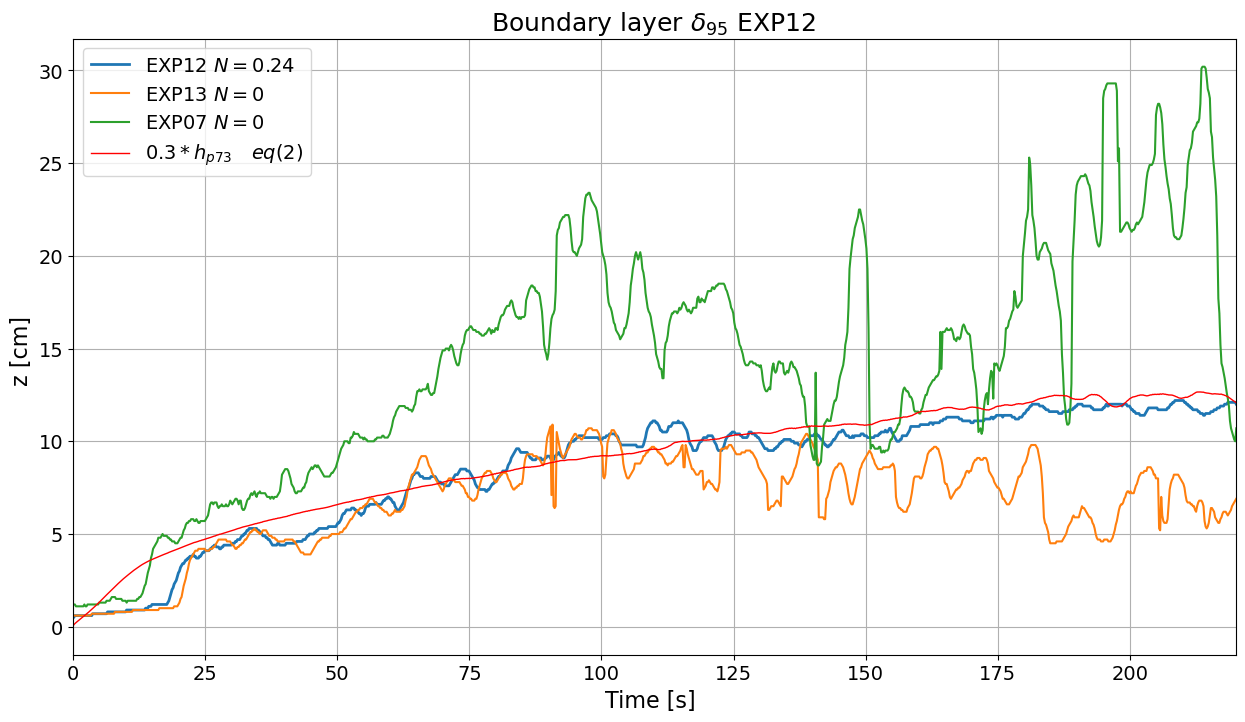

In [46]:
# Essaie sur EXP 12

BL = np.sqrt((nu*100)*time_stereo['EXP12']/Uinfty_stereo['EXP12'])
h_p73 = 2**(1/4) * Uinfty_stereo['EXP12']*np.sqrt(time_stereo['EXP12']/N['EXP12'])/20/3



plt.figure(figsize=(15,8))
plt.plot(time_stereo['EXP12'],d95_2_stereo['EXP12'],linewidth=2,label= 'EXP12 $N = 0.24 $')
#plt.plot(time_jai['EXP07'],d95_2_jai['EXP07'],linewidth=1.5,label= 'EXP07 $N=0$')
#plt.plot(time_stereo['EXP12'],BL,label= r'$\delta = \sqrt{\nu t /U_{\infty}}$')
plt.plot(time_stereo['EXP12'],h_p73,color='red',linewidth=1,label= r'$0.3*h_{p73} \quad eq(2)$')
plt.grid()
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'Boundary layer $\delta_{95}$ EXP12 ',fontsize=18)
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
#plt.ylim(-1,15)
#plt.xlim(0,time_stereo['EXP12'][-1])
plt.xlim(0,220)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



The plot above shows the initial growth of the $\delta_{95}$ height for EXP12. This experiment was a spin up with no initial rotation and a stratification of the order of $N = 0.24$ over the first 30 cm. The orange curve represents the theoretical value obtained from equation (2) **with a 1/3 factor**. In spite of this factor, we still find a law in $t^{1/2}$. 

I cannot continue the graph after 220 sec because the growth continue and it exeed the limit of the observed domain and thus the algorithm crash.

In [68]:
U_jai['EXP07']

<xarray.DataArray 'U' (coord_y: 391, Time: 1500)>
[586500 values with dtype=float32]
Coordinates:
  * Time     (Time) float32 -11.25 -11.05 -10.85 -10.65 ... 288.1 288.3 288.5
  * coord_y  (coord_y) float32 0.0 0.1 0.2 0.3 0.4 ... 38.6 38.7 38.8 38.9 39.0

There, either my algorithm fail, either the Imuyama limits fail. I'd lean more towards the first option 

# Momentum thickness


We can define 

**Reference** : Course _"Turbulence, diffusion and transport: Master Environmental Fluid Mechanics"_ **Joel Sommeria** p p94

# Ekman Boundary layer  

**Reference** : - _Sous et al., 2013_

Ekman transverse flux :
$$\int_0^{\infty} u_r dz = -\frac{u_*^2}{f}$$  


- Note that $v$ is the cartesian component accross the laser sheet which is tangent to the disc of radius $R=4.5m$. Thus this velocity component $v$ is strictly equal to $u_r$ the radial component only in the middle of the slice. However, given that $(2\pi R)/l_{\text{laser sheet}}\sim  88 $ we can approximate $v\sim u_r$. 

$l_{\text{laser sheet}} = 34$ cm for the stereo  

In [15]:
# This numerical code is only adaptable for Stereo data since it rely on radial componante of the velocity 

def EK_flux(num_exp):
    '''This function is aim to compute Ekman flux: 
    Variable: 
    name_exp must be a string in the format 'EXPXX'  
    cam must by either stereo '''
    

    time =  time_stereo[num_exp]
    u    = -ubar_stereo[num_exp]
    dy   =  dy_stereo
    y    =  Coord_y_stereo
    ny   =  Coord_y_stereo.size
    v   =   vbar_stereo[num_exp]    #transverse velocity
    
    flx_Ek  = np.zeros(len(time))
    
    #main programm
    for it in range (time.size):
        flx_Ek[it]  = np.sum( v[:,it]*dy)
    return flx_Ek

#cam = 'stereo'
#num_exp='EXP12'

#Ek_flux =fuction_EK_flux(num_exp)

In [16]:
Ek_flux     = {}
cam         = 'stereo'   
for exp in nexp_stereo :
    num_exp  =  str('EXP'+exp)
    Ek_flux[str('EXP'+exp)]  = EK_flux(num_exp)
    

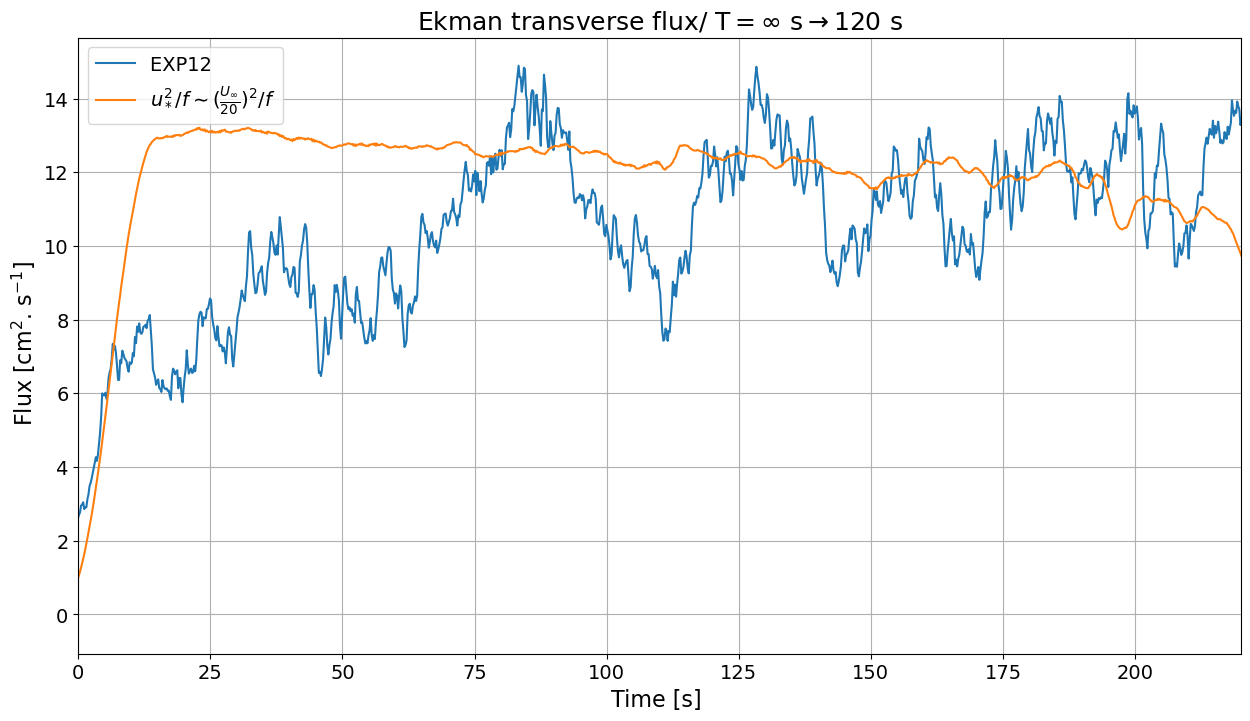

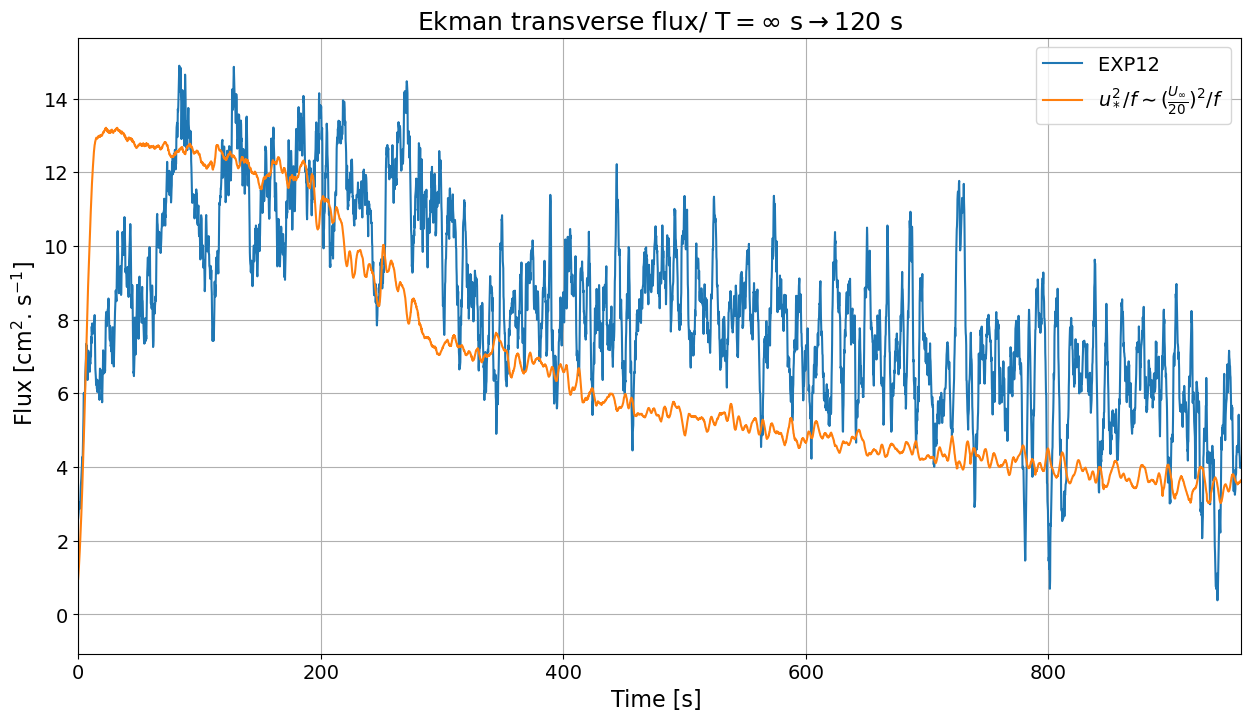

In [17]:
us     = Uinfty_stereo['EXP12']/20 
Ek_lim = us**2 / f['EXP16']

plt.figure(figsize=(15,8))
plt.plot(time_stereo['EXP12'],Ek_flux['EXP12'],label= 'EXP12 ')
plt.plot(time_stereo['EXP12'],Ek_lim,label= r'$u_*^2/f \sim (\frac{U_{\infty}}{20})^2 /f$')

plt.grid()
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'Ekman transverse flux/ T$=\infty ~$s$ \rightarrow 120~$s',fontsize=18)
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r' Flux [cm$^2$. s$^{-1}$] ', fontsize=16)
#plt.ylim(-1,15)
#plt.xlim(0,time_stereo['EXP12'][-1])
plt.xlim(0,220)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(time_stereo['EXP12'],Ek_flux['EXP12'],label= 'EXP12 ')
plt.plot(time_stereo['EXP12'],Ek_lim,label= r'$u_*^2/f \sim (\frac{U_{\infty}}{20})^2 /f$')

plt.grid()
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'Ekman transverse flux/ T$=\infty ~$s$ \rightarrow 120~$s',fontsize=18)
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r' Flux [cm$^2$. s$^{-1}$] ', fontsize=16)
#plt.ylim(-1,15)
plt.xlim(0,time_stereo['EXP12'][-1])
#plt.xlim(0,220)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()


The figures aboves shows the time evolution of the transverse flux $\int_0^{z_{max}} \overline{v} dz$ in blue for the EXP12 case of a spin-up without initial rotation. And in orange the curve $u_*^2/f \sim (\frac{U_{\infty}}{20})^2 /f$ which represents the radial transport in the Ekman theory for a parameter $f$ corresponding to the final rotation. 
The Top panel is only a zoom over the 220 first secondes.
What we can observe is that at the beginning, as expected, the transport is low because there is no transport due to Ekman pumping since there is no initial rotation. Then, after 100-200 seconds, the effects of rotation are felt and transport is approchin the value verified by Ekman pumping. the gap may be due to the underestimation of $u_*$ which is taken $u_* \sim \frac{U_{\infty}}{20}$
The transport values at short times can be explained by the deflection of the free surface by centrifugal effects. 


In this case of spin up with an initial rotation, in orange is the estimate of the ekman pumping for a coriolis parameter corresponding to the initial rotation and in green for the final rotation. It is quite difficult to draw any conclusions given the wide variations.  

## Ekman Spiral 

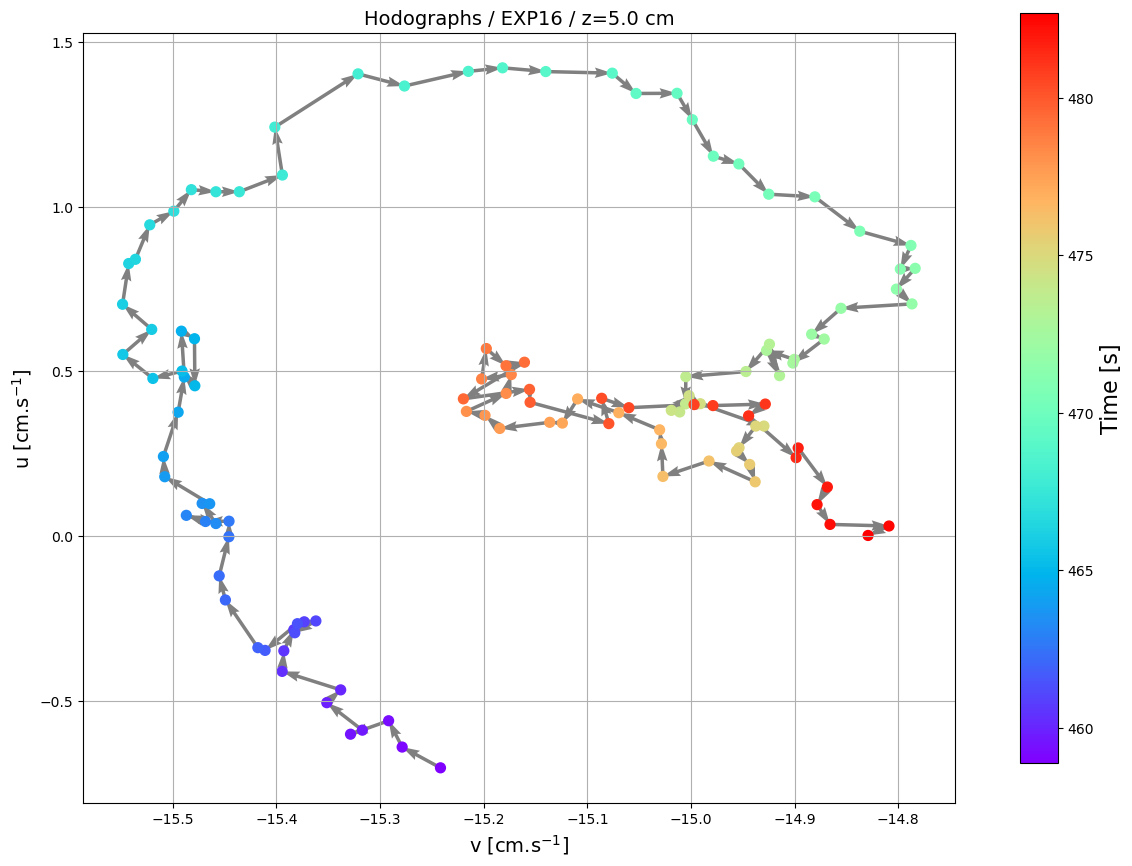

In [20]:

iy = 50
u = ubar_stereo['EXP16']
v = vbar_stereo['EXP16']
Tf = np.int64(2 * np.pi / f['EXP16'])
ti = 2500
idT = []
fig, ax = plt.subplots(figsize=(15, 10))
for it in range(ti, ti + 2 * Tf):
    idT.append(it)

#sc = ax.scatter(u[iy, idT], v[iy, idT],s=50, c=time_stereo['EXP16'][idT], cmap='rainbow')
#ax.plot(u[iy, idT], v[iy, idT], color='k', alpha=0.3, linewidth=1)

# Tracer des flèches reliant deux points consécutifs
for i in range(len(idT) - 1):
    ax.quiver(u[iy, idT[i]], v[iy, idT[i]], u[iy, idT[i + 1]] - u[iy, idT[i]], v[iy, idT[i + 1]] - v[iy, idT[i]], scale_units='xy', angles='xy',color='gray', scale=1, width=0.004)
sc = ax.scatter(u[iy, idT], v[iy, idT],s=50, c=time_stereo['EXP16'][idT], cmap='rainbow')
ax.set_xlabel('v [cm.s$^{-1}$]', fontsize=14)
ax.set_ylabel('u [cm.s$^{-1}$]', fontsize=14)
plt.title('Hodographs / EXP16 / z={} cm'.format(Coord_y_stereo[iy].data), fontsize=14)
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Time [s]', fontsize=16)
cbar.ax.locator_params(nbins=8)
cbar.ax.set_position([0.75, 0.15, 0.03, 0.75])  # [left, bottom, width, height]
plt.grid()

plt.show()




/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_12711/1918904863.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


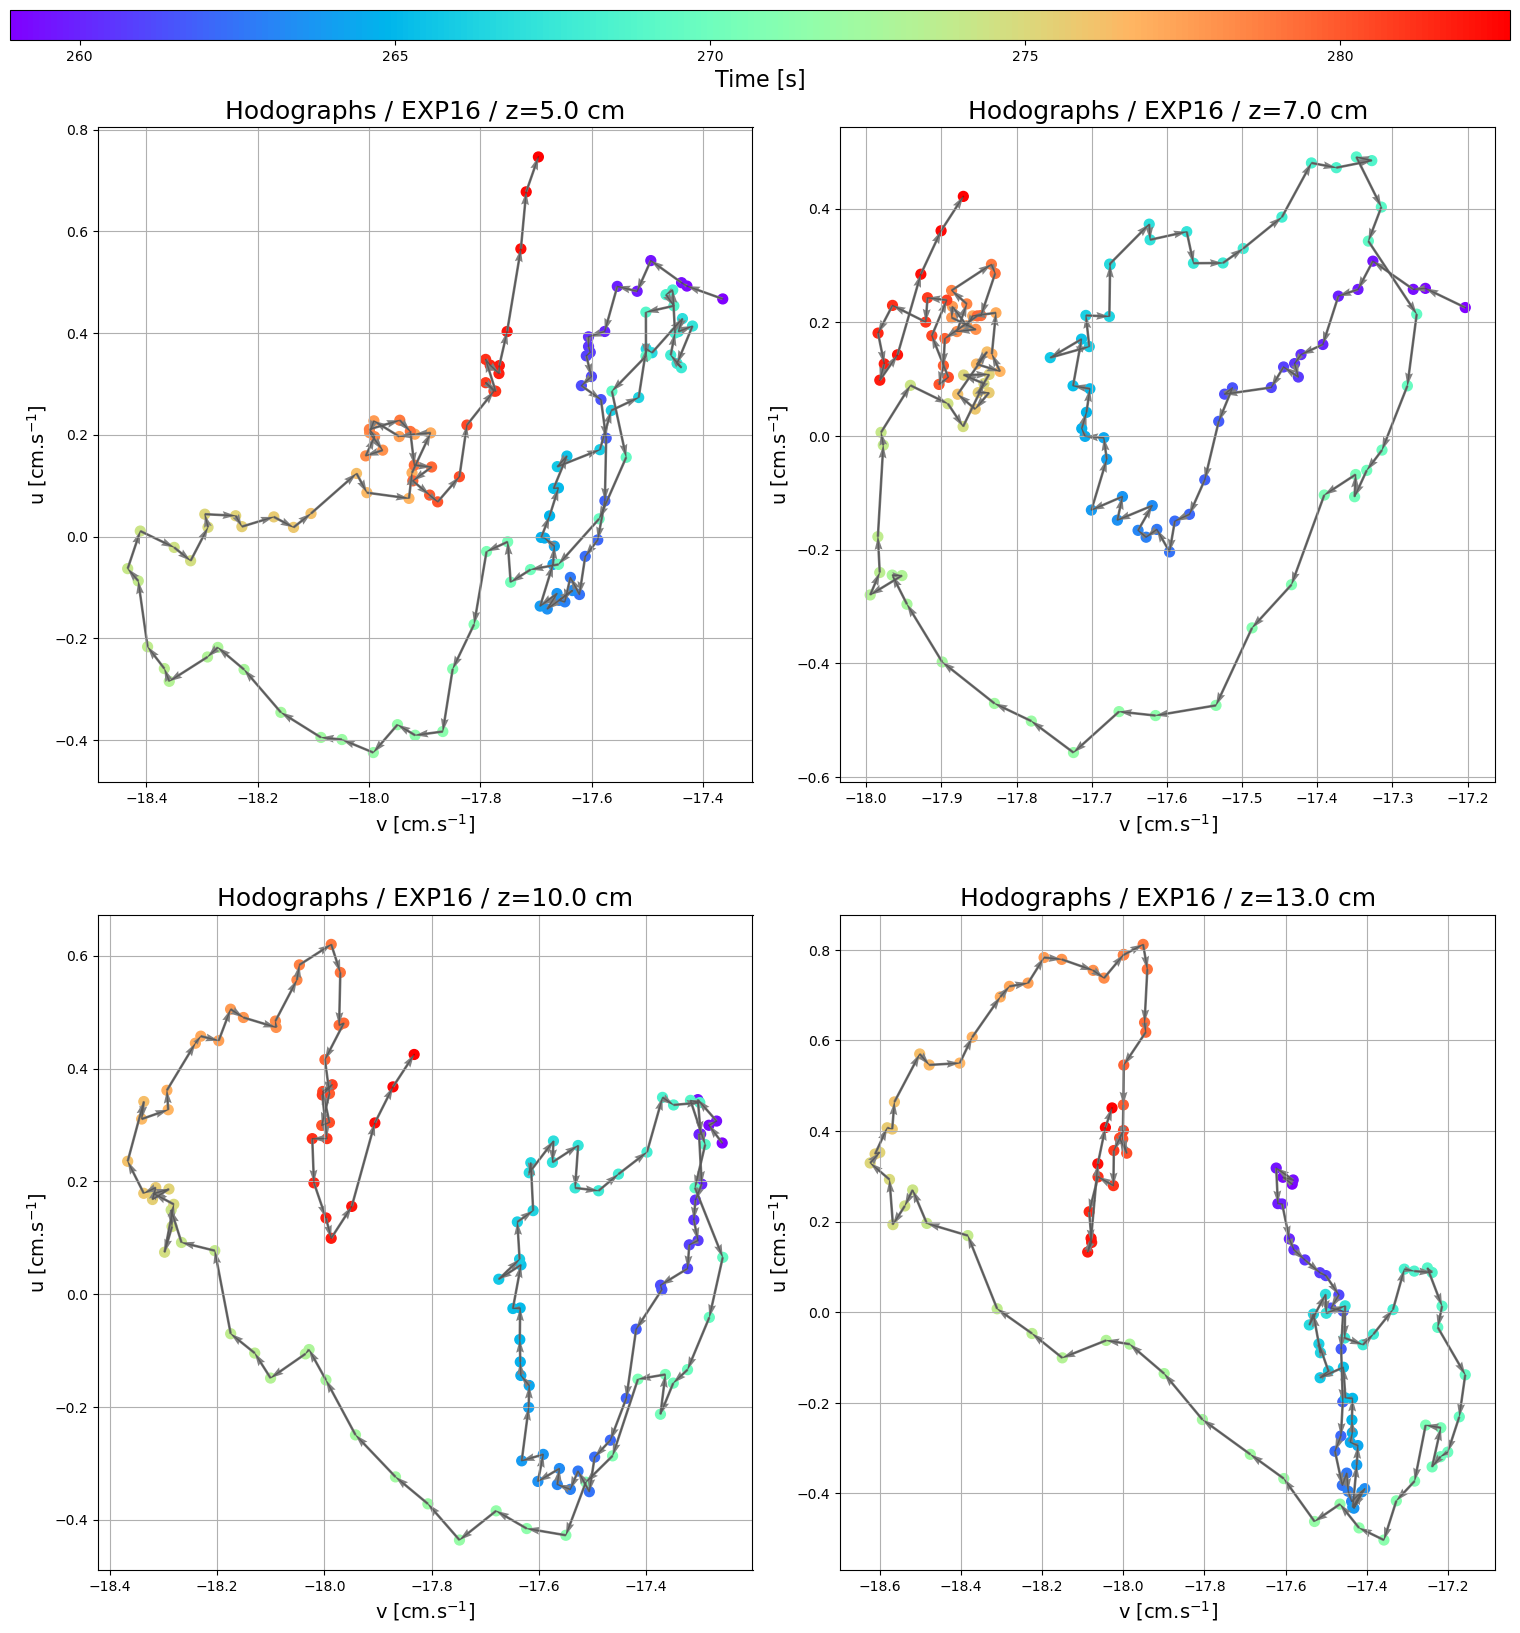

In [21]:
# Paramètres
u = ubar_stereo['EXP16']
v = vbar_stereo['EXP16']
Tf = np.int64(2 * np.pi / f['EXP16'])
ti = 1500
idT = []
iy_values = [50, 70, 100, 130]

# Créer la figure et les axes
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Itération sur les valeurs de iy pour créer les sous-graphiques
for iy, ax in zip(iy_values, axes.flatten()):
    for it in range(ti, ti + 2 * Tf):
        idT.append(it)

    sc = ax.scatter(u[iy, idT], v[iy, idT], s=50, c=time_stereo['EXP16'][idT], cmap='rainbow')
    ax.plot(u[iy, idT], v[iy, idT], color='k', alpha=0.3, linewidth=1)

    # Tracer des flèches reliant deux points consécutifs
    for i in range(len(idT) - 1):
        ax.quiver(u[iy, idT[i]], v[iy, idT[i]], u[iy, idT[i + 1]] - u[iy, idT[i]], v[iy, idT[i + 1]] - v[iy, idT[i]], scale_units='xy', angles='xy',color='gray', scale=1, width=0.004)
    ax.grid()
    ax.set_xlabel('v [cm.s$^{-1}$]', fontsize=14)
    ax.set_ylabel('u [cm.s$^{-1}$]', fontsize=14)
    ax.set_title('Hodographs / EXP16 / z={} cm'.format(Coord_y_stereo[iy].data), fontsize=18)
    idT = []

# Ajouter une barre de couleur commune
cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.2, aspect=50)
cbar.set_label('Time [s]', fontsize=16)

#cbar.ax.locator_params(nbins=8)
cbar.ax.set_position([0, 0.0, 1,1.05])  # [left, bottom, width, height]

plt.tight_layout()

plt.show()




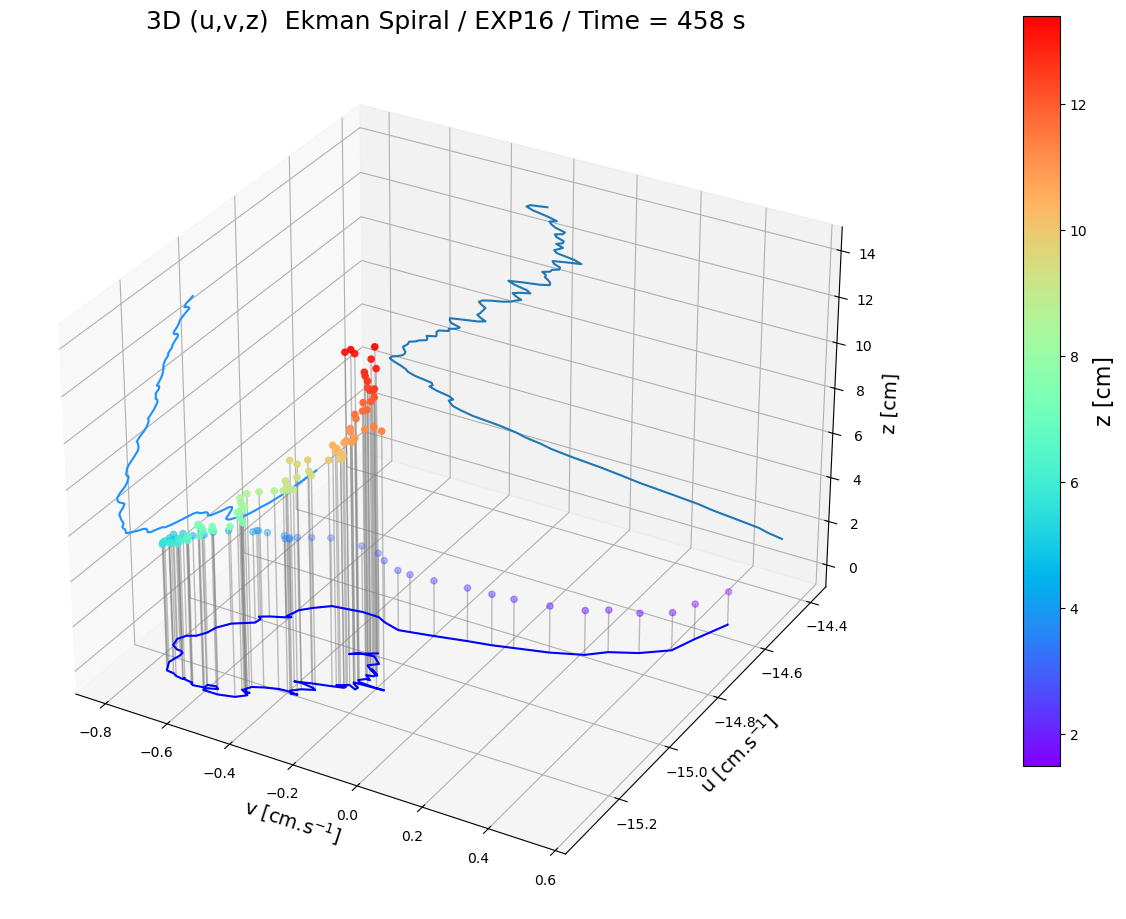

In [22]:
it = 2500
y_min = 15

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection='3d'))

# Normaliser les valeurs de Coord_y_stereo pour la colormap
norm = plt.Normalize(np.min(Coord_y_stereo), np.max(Coord_y_stereo))
colors = plt.cm.viridis(norm(Coord_y_stereo[y_min:]))

# Utiliser scatter pour un dégradé de couleur basé sur y
sc = ax.scatter(v[y_min:, it], u[y_min:, it], Coord_y_stereo[y_min:], c=Coord_y_stereo[y_min:], cmap='rainbow')


# Tracer les lignes verticales plus fines et grises
for i in range(len(Coord_y_stereo[y_min:])):
    ax.plot([v[y_min + i, it], v[y_min + i, it]], [u[y_min + i, it], u[y_min + i, it]], [0, Coord_y_stereo[y_min + i]], color='gray', alpha=0.5, linewidth=1)

ax.plot(v[y_min:, it], zs=-14.4, ys=Coord_y_stereo[y_min:], zdir='y')
ax.plot( u[y_min:, it] ,zs = -0.8, ys=Coord_y_stereo[y_min:], zdir='x',color='dodgerblue' )
# Ajouter la projection sur le plan u-v
ax.plot(v[y_min:, it], u[y_min:, it], 0, color='blue')  # Points projetés
for i in range(len(Coord_y_stereo[y_min:])):
    ax.plot([v[y_min + i, it], v[y_min + i, it]], [u[y_min + i, it], u[y_min + i, it]], [0, 0], 'k--', alpha=0.3)  # Lignes de projection
    
# Ajouter une barre de couleur
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('z [cm]', fontsize=16)
cbar.ax.locator_params(nbins=8)
cbar.ax.set_position([0.8, 0.3, 0.03, 0.5]) # [left, bottom, width, height]
#cbar.ax.tick_params(labelsize=14)
#cbar.ax.set_aspect(10)


# Ajouter une grille
ax.grid(True)

# Labels des axes
ax.set_xlabel('v [cm.s$^{-1}$]', fontsize=14)

ax.set_ylabel('u [cm.s$^{-1}$]', fontsize=14)
ax.set_zlabel('z [cm]', fontsize=14)

# Titre
ax.set_title('3D (u,v,z)  Ekman Spiral / EXP16 / Time = {} s'.format(np.int64(time_stereo['EXP16'][it].data))  ,  fontsize=18)

# Afficher la figure
plt.show()



In [40]:
us = [0.65, 1.04, 1.3]
pol = us/np.sqrt(0.104*0.25)
print(pol)

[4.03112887 6.4498062  8.06225775]
